In [1]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
#import tensorflow as tf
#tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

In [2]:
import matplotlib.pylab as plt
#!pip install netCDF4
#!pip install -U matplotlib==3.2
#!pip uninstall -y numpy
#!pip install numpy
#!pip install pyproj==1.9.6
#!apt-get install libgeos-3.5.0
#!apt-get install libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip
#!pip install sdv
from netCDF4 import Dataset, num2date
import pandas as pd
#from matplotlib.cbook import dedent
#from mpl_toolkits.basemap import Basemap
import numpy as np
%matplotlib inline
import xarray
import netCDF4 as nc
#conda install xarray or pip install xarray

## Raw Data Load from file

In [3]:
reshape_ocean_df_no_ssh=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df_no_ssh.csv')
reshape_ocean_df=pd.read_csv('/gpu_deep/Deep_Ocean/reshape_ocean_df.csv')

In [4]:
reshape_ocean_df_1965_no_ssh=reshape_ocean_df_no_ssh[reshape_ocean_df_no_ssh["DATE"]>'1965-01-01']

## Prepareing Test Dataset

In [5]:
reshape_ocean_df_1965_no_ssh_test=reshape_ocean_df_1965_no_ssh[(reshape_ocean_df_1965_no_ssh["DATE"]>'2012-01-01')&(reshape_ocean_df_1965_no_ssh["DATE"]<'2018-01-01')]
reshape_ocean_df_1965_test=reshape_ocean_df_1965_no_ssh_test[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [6]:
reshape_ocean_df_1965_no_ssh_test

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500
190,2012-02-13,104-07,37.0567,130.0,10.3738,10.3655,10.3686,10.3471,10.3453,10.3321,10.2734,10.2262,10.1683,5.7156,2.0377,1.3907,0.9241,0.7280
191,2012-04-10,104-07,37.0567,130.0,10.0053,9.7617,9.7313,9.7125,9.6859,9.6054,9.6032,9.5676,9.4891,8.1116,5.4549,1.9267,1.1010,0.7904
192,2012-06-23,104-07,37.0567,130.0,21.5347,21.3036,18.2941,16.1056,14.6527,13.3530,11.6631,10.0810,8.0057,4.5208,1.9919,1.3177,0.8824,0.6859
193,2012-08-25,104-07,37.0567,130.0,25.6487,25.6556,22.2801,13.0147,7.7121,4.0775,2.3304,1.7537,1.3463,1.0496,0.8625,0.7553,0.6019,0.5048
194,2012-10-09,104-07,37.0567,130.0,20.7129,20.6731,20.7165,21.3334,16.3933,10.2762,5.9902,3.1783,2.1866,1.4508,1.2012,0.9651,0.7232,0.5918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,2017-04-07,107-07,38.2100,130.0,12.4116,12.1538,11.9580,11.8349,11.7170,11.6479,11.2911,10.1389,7.2444,2.6008,1.4623,1.2188,0.9456,0.7695
3630,2017-06-18,107-07,38.2100,130.0,18.6714,18.4717,15.6906,15.9700,15.1972,11.3934,8.9937,5.7789,2.2420,1.3188,1.1628,0.9741,0.7597,0.6416
3631,2017-08-13,107-07,38.2100,130.0,25.7737,25.6909,18.8682,16.9893,15.4342,15.2041,14.0331,10.0209,5.9578,2.5165,1.4246,1.1840,0.9122,0.7319
3632,2017-10-16,107-07,38.2100,130.0,20.6556,20.6614,20.5930,20.5230,19.7756,16.6237,15.2251,12.6926,10.7990,5.8768,2.1434,1.3595,0.9605,0.7680


In [7]:
reshape_ocean_df_1965_test

,Station-Point,DATE,0,10,20,30,50,75,100,125,150,200,250,300
190,104-07,2012-02-13,10.3738,10.3655,10.3686,10.3471,10.3453,10.3321,10.2734,10.2262,10.1683,5.7156,2.0377,1.3907
191,104-07,2012-04-10,10.0053,9.7617,9.7313,9.7125,9.6859,9.6054,9.6032,9.5676,9.4891,8.1116,5.4549,1.9267
192,104-07,2012-06-23,21.5347,21.3036,18.2941,16.1056,14.6527,13.3530,11.6631,10.0810,8.0057,4.5208,1.9919,1.3177
193,104-07,2012-08-25,25.6487,25.6556,22.2801,13.0147,7.7121,4.0775,2.3304,1.7537,1.3463,1.0496,0.8625,0.7553
194,104-07,2012-10-09,20.7129,20.6731,20.7165,21.3334,16.3933,10.2762,5.9902,3.1783,2.1866,1.4508,1.2012,0.9651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,107-07,2017-04-07,12.4116,12.1538,11.9580,11.8349,11.7170,11.6479,11.2911,10.1389,7.2444,2.6008,1.4623,1.2188
3630,107-07,2017-06-18,18.6714,18.4717,15.6906,15.9700,15.1972,11.3934,8.9937,5.7789,2.2420,1.3188,1.1628,0.9741
3631,107-07,2017-08-13,25.7737,25.6909,18.8682,16.9893,15.4342,15.2041,14.0331,10.0209,5.9578,2.5165,1.4246,1.1840
3632,107-07,2017-10-16,20.6556,20.6614,20.5930,20.5230,19.7756,16.6237,15.2251,12.6926,10.7990,5.8768,2.1434,1.3595


In [8]:
reshape_ocean_df_test_1965_FEB=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-02-")]
reshape_ocean_df_test_1965_APR=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-04-")]
reshape_ocean_df_test_1965_JUN=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-06-")]
reshape_ocean_df_test_1965_AUG=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-08-")]
reshape_ocean_df_test_1965_OCT=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-10-")]
reshape_ocean_df_test_1965_DEC=reshape_ocean_df_1965_no_ssh_test[reshape_ocean_df_1965_no_ssh_test['DATE'].str.contains("-12-")]

In [9]:
reshape_ocean_df_test_1965_DEC

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500
195,2012-12-17,104-07,37.0567,130.0,14.8472,14.8768,14.8759,14.8798,14.4432,12.6186,6.4248,3.7188,2.1976,1.3480,1.0955,0.9503,0.6849,0.5620
201,2013-12-09,104-07,37.0567,130.0,16.2600,16.2700,16.2700,16.2800,16.4700,11.0600,6.1200,3.6200,2.8100,1.5200,1.2100,0.9700,0.7700,0.6200
207,2014-12-10,104-07,37.0567,130.0,16.8739,16.8857,16.8808,16.8253,16.5707,16.3690,16.0031,11.9273,5.1780,1.8834,1.1991,0.9886,0.7544,0.6015
213,2015-12-10,104-07,37.0567,130.0,16.6489,16.6463,16.2388,15.2402,15.1740,14.2003,13.7035,10.2022,7.7586,3.1014,1.6448,1.2571,0.9065,0.7624
219,2016-12-12,104-07,37.0567,130.0,17.8369,17.8387,17.8526,17.8562,17.8523,17.7609,15.9459,8.5955,4.4079,1.9763,1.3883,1.0990,0.8375,0.6805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,2013-12-05,107-07,38.2100,130.0,16.0400,16.0400,16.0400,16.0500,16.0500,15.9900,13.0000,6.9100,5.0300,2.0900,1.4200,1.1500,0.8700,0.7200
3615,2014-12-08,107-07,38.2100,130.0,16.2987,16.3163,16.3148,16.3167,16.3146,16.2291,16.1863,14.8824,10.5033,3.1013,1.6469,1.1936,0.9273,0.7760
3621,2015-12-07,107-07,38.2100,130.0,11.1873,11.3498,11.3021,11.2496,7.0401,2.8690,1.7190,1.4363,1.2470,0.9960,0.8773,0.8019,0.6869,0.5437
3627,2016-12-08,107-07,38.2100,130.0,17.2198,17.2605,17.3013,17.2925,17.2949,17.2795,16.4881,14.2800,10.2618,2.8704,1.6357,1.1397,0.8677,0.6972


In [10]:
reshape_ocean_df_1965_no_ssh=reshape_ocean_df_no_ssh[(reshape_ocean_df_no_ssh["DATE"]>'1965-01-01')&(reshape_ocean_df_no_ssh["DATE"]<'2012-01-01')]
reshape_ocean_df_1965=reshape_ocean_df_1965_no_ssh[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [11]:
reshape_ocean_df_1965

,Station-Point,DATE,0,10,20,30,50,75,100,125,150,200,250,300
1,104-07,1968-06-13,17.2600,16.2000,14.3000,14.2100,13.4200,9.2100,6.7000,5.3500,3.6200,1.1900,0.9000,0.6700
2,104-07,1968-10-22,20.2000,20.2700,20.5400,20.5400,14.3100,8.7400,8.1600,6.4400,3.6000,2.6600,2.1400,0.9300
3,104-07,1968-12-06,14.2200,14.3200,15.6000,14.5800,14.5600,12.4200,9.7700,8.7100,8.4000,8.2600,5.2200,2.3500
4,104-07,1969-04-26,11.2700,11.3000,11.2400,11.2000,10.0900,9.1100,7.4200,5.3200,3.1800,1.4400,1.0300,0.6800
5,104-07,1969-06-15,18.0100,17.7700,16.8200,16.2900,13.6700,11.7900,10.8500,10.2400,8.6000,4.8900,2.0300,1.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,107-07,2011-04-09,10.6800,10.6393,10.0102,9.4257,9.1619,8.3028,5.7166,3.9712,2.4332,1.6043,1.2444,1.0023
3594,107-07,2011-06-10,18.5672,18.2166,16.2174,14.2821,14.1390,13.4504,11.6690,8.7099,4.3913,2.7345,1.6278,1.2212
3595,107-07,2011-08-26,24.8521,24.8715,15.1842,12.9417,7.3652,4.1746,2.7647,1.7383,1.7991,1.3317,1.0932,0.9361
3596,107-07,2011-10-05,19.7713,19.7552,19.7224,14.9795,6.4783,4.1959,2.6175,1.9992,1.5526,1.3049,1.1378,0.9538


## Seasonal Dataset 1965_dataset(Sprint, Summer, Autumn, Winter)

In [12]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_1965_APR=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_1965_JUN=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_1965_AUG=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_1965_OCT=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_1965_DEC=reshape_ocean_df_1965_no_ssh[reshape_ocean_df_1965_no_ssh['DATE'].str.contains("-12-")]

In [13]:
reshape_ocean_df_1965_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500
7,1971-02-11,104-07,37.0567,130.0,9.3500,9.3500,9.3000,9.3000,9.3000,9.3000,9.3000,8.3000,8.3500,6.5000,3.7000,2.5000,1.1500,0.9000
13,1972-02-15,104-07,37.0567,130.0,10.0800,11.9200,12.0100,12.0100,12.1200,12.0000,10.4600,8.4900,5.6400,2.6000,1.2600,0.7800,0.4700,0.3600
19,1973-02-13,104-07,37.0567,130.0,9.8700,10.2500,10.4200,10.3000,10.3900,9.8700,8.9600,7.0800,5.2600,3.0000,2.3000,1.4800,0.7200,0.4800
24,1974-02-17,104-07,37.0567,130.0,8.8000,9.3000,9.2700,9.2000,9.1800,9.1500,9.1000,9.0000,8.4200,5.9000,3.0800,3.0000,2.8500,2.5000
30,1975-02-25,104-07,37.0567,130.0,9.4200,9.5600,9.4000,8.1500,8.0000,5.2700,3.9500,4.0300,3.4300,2.9200,2.8000,2.0000,1.5500,1.1300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3556,2004-02-10,107-07,38.2100,130.0,11.7000,11.1500,11.1900,11.1800,11.1800,11.1800,11.1800,11.1800,11.1800,11.1900,8.7200,5.2700,1.1200,0.7300
3574,2008-02-14,107-07,38.2100,130.0,11.0911,11.1162,11.1221,11.1190,11.1099,10.9839,7.3006,6.7429,3.9243,1.8866,1.3115,1.0084,0.7652,0.6140
3580,2009-02-18,107-07,38.2100,130.0,10.2540,10.2498,10.2094,10.1739,10.1626,10.1561,10.1596,10.1551,10.1583,10.3840,7.2413,3.9031,1.1771,0.8400
3586,2010-02-20,107-07,38.2100,130.0,9.1856,9.2022,9.1600,9.1500,9.1248,8.9550,8.8642,8.8413,8.6205,5.7925,3.1166,1.5429,0.8986,0.7464


## Seasonal Dataset (Spring, Summer, Autumn, Winter)

In [14]:
reshape_ocean_df_ssh=reshape_ocean_df
reshape_ocean_df_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'1993-01-01')&(reshape_ocean_df["DATE"]<'2013-01-01')]

In [15]:
reshape_ocean_df_ssh=reshape_ocean_df_ssh.dropna()

In [16]:
reshape_ocean_df_ssh

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
1,1993-04-16,104-07,37.0567,130.0,13.3900,12.7900,12.4400,12.1200,11.0000,7.8500,4.7000,3.2100,2.1100,1.5300,1.2700,1.2400,0.9900,0.8000,0.5627
2,1993-06-02,104-07,37.0567,130.0,18.9100,18.4000,15.2100,11.6900,8.6500,5.8800,4.5600,2.3200,1.7200,1.3100,1.1000,0.9800,0.8200,0.7500,0.5553
3,1993-08-17,104-07,37.0567,130.0,20.2800,18.8200,17.3900,13.9500,7.7100,5.2500,3.6500,2.9000,2.2700,1.4600,1.4600,1.1700,0.8000,0.6200,0.4027
4,1993-10-27,104-07,37.0567,130.0,18.5500,18.4000,18.3500,18.2900,17.3000,16.0900,11.7200,10.5700,9.4500,5.6100,3.0600,1.8100,1.0500,0.8500,0.6760
5,1993-12-16,104-07,37.0567,130.0,12.4100,12.4100,12.3100,12.3100,11.2400,10.4300,8.9500,7.7600,7.4400,5.6100,4.4500,2.5800,1.3800,0.7500,0.4738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2012-04-07,107-07,38.2100,130.0,7.2435,7.2482,7.1691,7.1543,7.1461,7.1135,5.3708,2.8265,2.0889,1.5004,1.1775,1.0015,0.7554,0.6425,0.4388
2304,2012-06-29,107-07,38.2100,130.0,21.2183,18.8585,12.7813,9.7589,5.8134,3.5280,2.4385,1.7777,1.4541,1.1973,1.0443,0.9072,0.7076,0.5878,0.4875
2305,2012-08-21,107-07,38.2100,130.0,25.3148,25.3099,15.7167,13.3564,6.8327,4.0751,2.4039,1.8203,1.4802,1.1713,1.0056,0.8619,0.6884,0.5800,0.6290
2306,2012-10-05,107-07,38.2100,130.0,19.9044,19.8322,17.2033,14.4120,8.7710,3.8223,2.4153,1.6305,1.3753,1.0793,0.9115,0.8174,0.5990,0.5154,0.6352


## Preparing Test Dataset

In [17]:
reshape_ocean_df_test_ssh=reshape_ocean_df[(reshape_ocean_df["DATE"]>'2013-01-01')&(reshape_ocean_df["DATE"]<'2018-01-01')]

In [18]:
reshape_ocean_df_test_ssh

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
105,2013-02-26,104-07,37.0567,130.0,10.2100,10.2000,10.2100,10.2100,10.2200,10.2200,10.2200,9.7000,8.0400,4.2800,1.9800,1.3400,0.8600,0.6700,0.6073
106,2013-04-16,104-07,37.0567,130.0,14.2800,14.2800,14.2800,14.2800,14.2800,13.1500,11.9800,11.0400,10.1900,2.3100,1.3700,1.1000,0.7800,0.6300,0.6225
107,2013-06-10,104-07,37.0567,130.0,20.4100,19.3500,17.0700,12.8500,6.4700,2.4600,1.7400,1.3500,1.1900,0.9900,0.9100,0.8200,0.7100,0.6400,0.4956
108,2013-08-21,104-07,37.0567,130.0,24.4200,18.8400,17.8800,17.1000,16.0000,15.0100,9.3500,5.0500,3.8100,2.7600,2.2100,1.2900,1.0300,0.8400,0.6789
109,2013-10-28,104-07,37.0567,130.0,20.6900,20.6900,20.6900,20.6900,18.9900,16.2600,14.0700,9.7400,5.8000,2.5900,1.4900,1.1700,0.8600,0.7100,0.8257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2017-04-07,107-07,38.2100,130.0,12.4116,12.1538,11.9580,11.8349,11.7170,11.6479,11.2911,10.1389,7.2444,2.6008,1.4623,1.2188,0.9456,0.7695,0.5897
2334,2017-06-18,107-07,38.2100,130.0,18.6714,18.4717,15.6906,15.9700,15.1972,11.3934,8.9937,5.7789,2.2420,1.3188,1.1628,0.9741,0.7597,0.6416,0.5745
2335,2017-08-13,107-07,38.2100,130.0,25.7737,25.6909,18.8682,16.9893,15.4342,15.2041,14.0331,10.0209,5.9578,2.5165,1.4246,1.1840,0.9122,0.7319,0.6942
2336,2017-10-16,107-07,38.2100,130.0,20.6556,20.6614,20.5930,20.5230,19.7756,16.6237,15.2251,12.6926,10.7990,5.8768,2.1434,1.3595,0.9605,0.7680,0.8563


In [19]:
reshape_ocean_df_test_FEB=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_test_APR=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_test_JUN=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_test_AUG=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_test_OCT=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_test_DEC=reshape_ocean_df_test_ssh[reshape_ocean_df_test_ssh['DATE'].str.contains("-12-")]

In [20]:
reshape_ocean_df_test_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
105,2013-02-26,104-07,37.0567,130.0000,10.2100,10.2000,10.2100,10.2100,10.2200,10.2200,10.2200,9.7000,8.0400,4.2800,1.9800,1.3400,0.8600,0.6700,0.6073
111,2014-02-26,104-07,37.0567,130.0000,12.9716,12.9674,12.9667,12.9479,12.3483,10.0966,9.8722,9.1007,7.1873,2.1594,1.1966,1.0668,0.8670,0.7287,0.6250
117,2015-02-12,104-07,37.0567,130.0000,11.1282,11.1192,11.1243,11.1230,11.1214,10.8280,10.5610,10.3141,8.9486,4.0730,2.1702,1.2907,0.8707,0.7022,0.6824
123,2016-02-23,104-07,37.0567,130.0000,10.8104,10.8129,10.8140,10.8173,10.8194,10.8163,10.2768,9.8207,8.1084,4.7318,1.9949,1.3200,0.9161,0.7585,0.6519
129,2017-02-14,104-07,37.0567,130.0000,11.8946,11.9003,11.9083,11.9082,11.9059,11.9179,11.9257,12.0428,9.7272,3.7605,1.9039,1.4564,0.9284,0.7834,0.7680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,2017-02-04,106-11,37.8950,131.2517,8.8743,8.7968,8.7203,8.6294,8.6234,8.5095,4.3796,2.2022,1.7074,1.3022,1.0645,0.9418,0.8137,0.6432,0.5418
2308,2013-02-17,107-07,38.2100,130.0000,11.1200,11.1200,11.1200,10.8500,10.5500,9.3500,6.3400,3.7500,2.8100,1.4200,1.0700,0.9400,0.7600,0.6300,0.5160
2320,2015-02-03,107-07,38.2100,130.0000,11.8344,11.7737,11.7747,11.7752,11.7765,11.7695,11.7663,11.7587,10.1508,3.8775,1.6075,1.1346,0.8868,0.7414,0.6372
2326,2016-02-19,107-07,38.2100,130.0000,6.8415,6.6342,6.5504,6.5241,6.1056,4.2437,2.9534,2.2449,1.7512,1.3519,1.1226,0.9610,0.8157,0.6932,0.4823


In [21]:
reshape_ocean_df_ssh

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
1,1993-04-16,104-07,37.0567,130.0,13.3900,12.7900,12.4400,12.1200,11.0000,7.8500,4.7000,3.2100,2.1100,1.5300,1.2700,1.2400,0.9900,0.8000,0.5627
2,1993-06-02,104-07,37.0567,130.0,18.9100,18.4000,15.2100,11.6900,8.6500,5.8800,4.5600,2.3200,1.7200,1.3100,1.1000,0.9800,0.8200,0.7500,0.5553
3,1993-08-17,104-07,37.0567,130.0,20.2800,18.8200,17.3900,13.9500,7.7100,5.2500,3.6500,2.9000,2.2700,1.4600,1.4600,1.1700,0.8000,0.6200,0.4027
4,1993-10-27,104-07,37.0567,130.0,18.5500,18.4000,18.3500,18.2900,17.3000,16.0900,11.7200,10.5700,9.4500,5.6100,3.0600,1.8100,1.0500,0.8500,0.6760
5,1993-12-16,104-07,37.0567,130.0,12.4100,12.4100,12.3100,12.3100,11.2400,10.4300,8.9500,7.7600,7.4400,5.6100,4.4500,2.5800,1.3800,0.7500,0.4738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,2012-04-07,107-07,38.2100,130.0,7.2435,7.2482,7.1691,7.1543,7.1461,7.1135,5.3708,2.8265,2.0889,1.5004,1.1775,1.0015,0.7554,0.6425,0.4388
2304,2012-06-29,107-07,38.2100,130.0,21.2183,18.8585,12.7813,9.7589,5.8134,3.5280,2.4385,1.7777,1.4541,1.1973,1.0443,0.9072,0.7076,0.5878,0.4875
2305,2012-08-21,107-07,38.2100,130.0,25.3148,25.3099,15.7167,13.3564,6.8327,4.0751,2.4039,1.8203,1.4802,1.1713,1.0056,0.8619,0.6884,0.5800,0.6290
2306,2012-10-05,107-07,38.2100,130.0,19.9044,19.8322,17.2033,14.4120,8.7710,3.8223,2.4153,1.6305,1.3753,1.0793,0.9115,0.8174,0.5990,0.5154,0.6352


## Preparing Train Dataset

In [22]:
reshape_ocean_df_FEB=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-02-")]
reshape_ocean_df_APR=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-04-")]
reshape_ocean_df_JUN=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-06-")]
reshape_ocean_df_AUG=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-08-")]
reshape_ocean_df_OCT=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-10-")]
reshape_ocean_df_DEC=reshape_ocean_df_ssh[reshape_ocean_df_ssh['DATE'].str.contains("-12-")]

In [23]:
reshape_ocean_df_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
6,1994-02-20,104-07,37.0567,130.0,9.2200,8.3500,7.5800,6.4400,6.3000,6.0800,4.7100,3.8900,3.2000,2.3300,1.8900,1.7200,1.2400,0.7400,0.4169
17,1996-02-14,104-07,37.0567,130.0,8.8700,8.8800,8.8700,8.8600,7.6000,6.6800,4.4900,4.6700,4.6300,2.8600,1.3900,1.1200,0.7700,0.4900,0.4374
23,1997-02-14,104-07,37.0567,130.0,10.0300,9.8900,9.3100,9.2300,7.7900,5.7300,3.7800,2.4200,1.8600,1.4100,0.9500,0.7900,0.5700,0.4300,0.4916
29,1998-02-23,104-07,37.0567,130.0,12.8400,12.8400,12.8300,12.8100,12.8000,12.8000,9.8900,6.2900,3.2500,1.6700,1.1400,0.9100,0.6400,0.4800,0.5317
34,1999-02-15,104-07,37.0567,130.0,11.1800,11.1800,11.1900,11.1900,11.1900,11.1900,11.1900,11.1900,10.9300,6.5800,2.5900,1.4500,0.9700,0.6900,0.5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2278,2008-02-14,107-07,38.2100,130.0,11.0911,11.1162,11.1221,11.1190,11.1099,10.9839,7.3006,6.7429,3.9243,1.8866,1.3115,1.0084,0.7652,0.6140,0.5519
2284,2009-02-18,107-07,38.2100,130.0,10.2540,10.2498,10.2094,10.1739,10.1626,10.1561,10.1596,10.1551,10.1583,10.3840,7.2413,3.9031,1.1771,0.8400,0.6178
2290,2010-02-20,107-07,38.2100,130.0,9.1856,9.2022,9.1600,9.1500,9.1248,8.9550,8.8642,8.8413,8.6205,5.7925,3.1166,1.5429,0.8986,0.7464,0.5948
2296,2011-02-16,107-07,38.2100,130.0,9.9124,9.3507,6.3991,5.7713,4.8134,3.4221,3.6524,2.7318,2.1198,1.2732,0.9811,0.8697,0.6953,0.5546,0.4044


## Compare distribution of 1965_FEB vs 1993_FEB

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


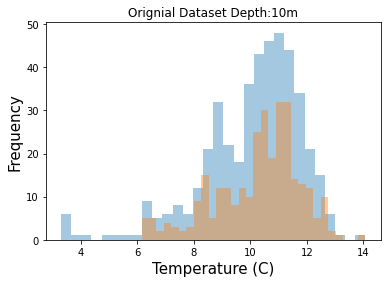

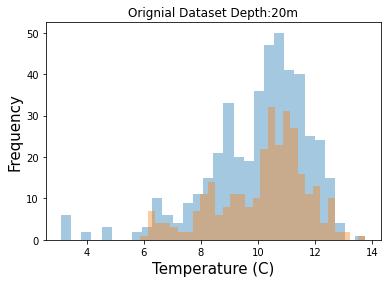

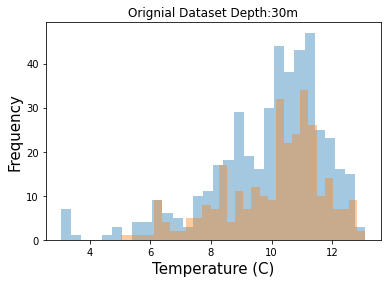

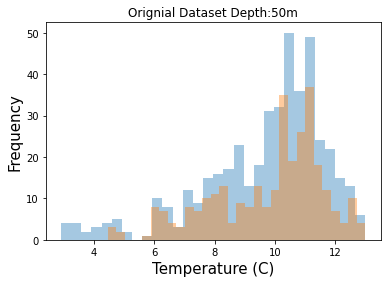

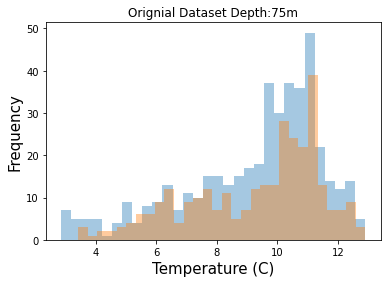

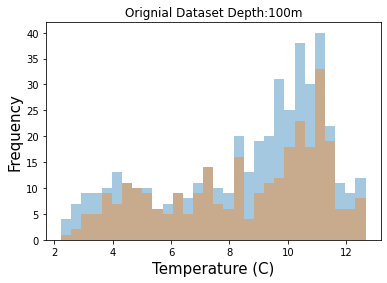

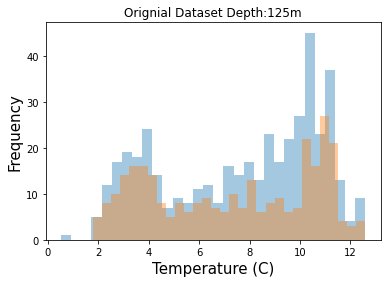

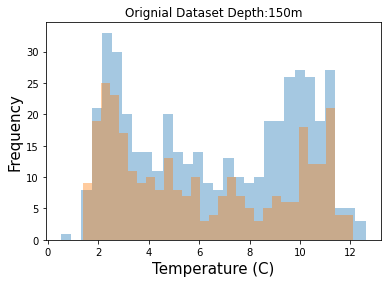

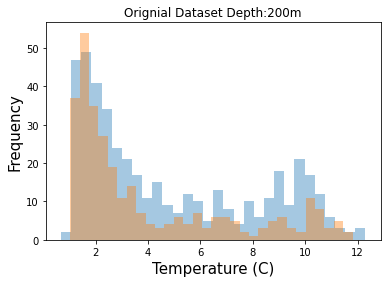

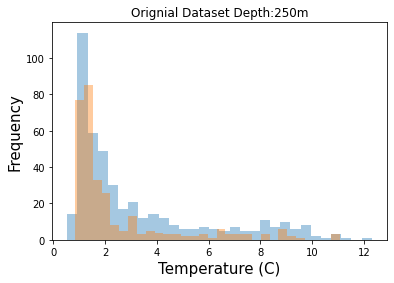

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False)
    sns.distplot(reshape_ocean_df_FEB[depth],bins=30,kde=False)
    plt.xlabel("Temperature (C)", fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    plt.title('Orignial Dataset Depth:'+depth+'m')
    plt.show()
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)


## SDV Constraints

In [25]:
from sdv.constraints import GreaterThan
depth_temp_0_10_const = GreaterThan(
low='10',
high='0',
handling_strategy='reject_sampling')
#0	10	20	30	50	75	100	125	150	200	250	300	400	500
depth_temp_20_10_const = GreaterThan(
low='20',
high='10',
handling_strategy='reject_sampling')

depth_temp_30_20_const = GreaterThan(
low='30',
high='20',
handling_strategy='reject_sampling')

depth_temp_50_30_const = GreaterThan(
low='50',
high='30',
handling_strategy='reject_sampling')

depth_temp_75_50_const = GreaterThan(
low='75',
high='50',
handling_strategy='reject_sampling')

depth_temp_100_75_const = GreaterThan(
low='100',
high='75',
handling_strategy='reject_sampling')

depth_temp_125_100_const = GreaterThan(
low='125',
high='100',
handling_strategy='reject_sampling')

depth_temp_150_125_const = GreaterThan(
low='150',
high='125',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


depth_temp_250_200_const = GreaterThan(
low='250',
high='200',
handling_strategy='reject_sampling')

depth_temp_300_250_const = GreaterThan(
low='300',
high='250',
handling_strategy='reject_sampling')

depth_temp_400_300_const = GreaterThan(
low='400',
high='300',
handling_strategy='reject_sampling')

depth_temp_500_400_const = GreaterThan(
low='500',
high='400',
handling_strategy='reject_sampling')

constraints_upper = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const,
                     depth_temp_400_300_const,
                     depth_temp_500_400_const]

constraints_upper2 = [depth_temp_0_10_const,
                     depth_temp_20_10_const,
                     depth_temp_30_20_const,
                     depth_temp_50_30_const,
                     depth_temp_75_50_const,
                     depth_temp_100_75_const,
                     depth_temp_125_100_const,
                     depth_temp_150_125_const,
                     depth_temp_200_150_const,
                     depth_temp_250_200_const,
                     depth_temp_300_250_const]



depth_temp_20_0_const = GreaterThan(
low='20',
high='0',
handling_strategy='reject_sampling')

depth_temp_50_20_const = GreaterThan(
low='50',
high='0',
handling_strategy='reject_sampling')


depth_temp_100_50_const = GreaterThan(
low='100',
high='50',
handling_strategy='reject_sampling')


depth_temp_150_100_const = GreaterThan(
low='150',
high='100',
handling_strategy='reject_sampling')


depth_temp_200_150_const = GreaterThan(
low='200',
high='150',
handling_strategy='reject_sampling')


constraints_upper3 = [depth_temp_20_0_const,
                      depth_temp_50_20_const,
                      depth_temp_100_50_const]

In [26]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()

for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_1965_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_1965_'+mon]=model_output
    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
    globals()['model_output_df_'+mon]=model_output
    globals()['temp_tvae_model_output_df_'+mon]=model_output

    
model=GaussianCopula(constraints=constraints_upper3)
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    model.fit(globals()['reshape_ocean_df_'+mon])
    model_output=model.sample(2000, max_retries=1000000)
    model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
    model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
    model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
    model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
    model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
    model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
    model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
    model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
    model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
    model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
    globals()['model_output_df_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+mon])])
    #globals()['model_output_df_'+mon]=model_output    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWa

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments w

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate da

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_st

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  F

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  F

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will res

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate da

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  F

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/optimize.py:283: RuntimeWarning: Values in x were outside bou

In [27]:
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        station_select=str('reshape_ocean_df_1965_'+mon)
        #print(station_select)
        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
        globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=globals()['reshape_ocean_df_1965_'+mon][globals()['reshape_ocean_df_1965_'+mon]['Station-Point']==station]

In [28]:
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        station_select=str('reshape_ocean_df_'+mon)
        #print(station_select)
        #globals()['reshape_ocean_df_1965_'+new_station+'_'+mon]=reshape_ocean_df_1965_FEB[reshape_ocean_df_1965_FEB['Station-Point']==station]
        globals()['reshape_ocean_df_'+new_station+'_'+mon]=globals()['reshape_ocean_df_'+mon][globals()['reshape_ocean_df_'+mon]['Station-Point']==station]

## Station-Point Synthetic (104-105)

In [29]:
reshape_ocean_df_1965

,Station-Point,DATE,0,10,20,30,50,75,100,125,150,200,250,300
1,104-07,1968-06-13,17.2600,16.2000,14.3000,14.2100,13.4200,9.2100,6.7000,5.3500,3.6200,1.1900,0.9000,0.6700
2,104-07,1968-10-22,20.2000,20.2700,20.5400,20.5400,14.3100,8.7400,8.1600,6.4400,3.6000,2.6600,2.1400,0.9300
3,104-07,1968-12-06,14.2200,14.3200,15.6000,14.5800,14.5600,12.4200,9.7700,8.7100,8.4000,8.2600,5.2200,2.3500
4,104-07,1969-04-26,11.2700,11.3000,11.2400,11.2000,10.0900,9.1100,7.4200,5.3200,3.1800,1.4400,1.0300,0.6800
5,104-07,1969-06-15,18.0100,17.7700,16.8200,16.2900,13.6700,11.7900,10.8500,10.2400,8.6000,4.8900,2.0300,1.8100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3593,107-07,2011-04-09,10.6800,10.6393,10.0102,9.4257,9.1619,8.3028,5.7166,3.9712,2.4332,1.6043,1.2444,1.0023
3594,107-07,2011-06-10,18.5672,18.2166,16.2174,14.2821,14.1390,13.4504,11.6690,8.7099,4.3913,2.7345,1.6278,1.2212
3595,107-07,2011-08-26,24.8521,24.8715,15.1842,12.9417,7.3652,4.1746,2.7647,1.7383,1.7991,1.3317,1.0932,0.9361
3596,107-07,2011-10-05,19.7713,19.7552,19.7224,14.9795,6.4783,4.1959,2.6175,1.9992,1.5526,1.3049,1.1378,0.9538


In [30]:
from sdv.tabular import CopulaGAN
from sdv.tabular import GaussianCopula
from sdv.tabular import TVAE
#model_upper = CopulaGAN(constraints=constraints_upper)
#model=CopulaGAN()
#model_upper.fit(ocean_train_upper)
#model.fit(reshape_ocean_df_1965)
#model_upper.sample(100, max_retries=100000, conditions=conditions)
#model_output=model.sample(1000, max_retries=1000000)
#reshape_ocean_df_1965.hist()
#model_output.hist()

#model=CopulaGAN(constraints=constraints_upper3)

model=TVAE()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_1965_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
        globals()['model_output_df_1965_'+new_station+'_'+mon]=model_output
    
#model=CopulaGAN(constraints=constraints_upper3)
model=TVAE()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])  
        globals()['model_output_df_'+new_station+'_'+mon]=model_output
        globals()['temp_tvae_model_output_df_'+new_station+'_'+mon]=model_output

    
model=GaussianCopula()
for station in ['104-08','104-09','104-10','105-08','105-09','105-10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        new_station=station.replace('-','_')
        model.fit(globals()['reshape_ocean_df_'+new_station+'_'+mon])
        model_output=model.sample(2000, max_retries=1000000)
        model_output['10']=np.where((model_output['10']>model_output['0']),model_output['0'],model_output['10'])
        model_output['20']=np.where((model_output['20']>model_output['10']),model_output['10'],model_output['20'])
        model_output['30']=np.where((model_output['30']>model_output['20']),model_output['20'],model_output['30'])
        model_output['50']=np.where((model_output['50']>model_output['30']),model_output['30'],model_output['50'])
        model_output['75']=np.where((model_output['75']>model_output['50']),model_output['50'],model_output['75'])
        model_output['100']=np.where((model_output['100']>model_output['75']),model_output['75'],model_output['100'])
        model_output['125']=np.where((model_output['125']>model_output['100']),model_output['100'],model_output['125'])
        model_output['150']=np.where((model_output['150']>model_output['125']),model_output['125'],model_output['150'])
        model_output['200']=np.where((model_output['200']>model_output['150']),model_output['150'],model_output['200'])
        model_output['250']=np.where((model_output['250']>model_output['200']),model_output['200'],model_output['250'])
        globals()['model_output_df_'+new_station+'_'+mon]=pd.concat([model_output,pd.DataFrame(globals()['temp_tvae_model_output_df_'+new_station+'_'+mon])])
        #globals()['model_output_df_'+mon]=model_output    
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=ran

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuse

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encount

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/gisuser/.conda/envs/ocean-deep/li

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:4994: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:2494: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a 

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:5003: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/scipy/stats/_

## Write CSV for model_output

In [31]:
for station in ['104_08','104_09','104_10','105_08','105_09','105_10']:
    for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
        globals()['model_output_df_1965_'+station+'_'+mon].to_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_1965_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_df_'+station+'_'+mon].to_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))

## Read CSV for model_output

In [32]:
for mon in ['FEB','APR','JUN','AUG','OCT','DEC']:
    globals()['model_output_1965_'+mon]=pd.DataFrame()
    globals()['model_output_df_'+mon]=pd.DataFrame()
    for station in ['104_08','104_09','104_10','105_08','105_09','105_10']:
        temp_model_1965=pd.read_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_1965_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_1965_'+mon]=pd.concat([globals()['model_output_1965_'+mon],temp_model_1965])
        temp_model=pd.read_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))
        globals()['model_output_df_'+mon]=pd.concat([globals()['model_output_df_'+mon],temp_model])
        #temp_model=pd.read_csv(str('/gpu_deep/Deep_Ocean/Synthetic/model_output_df_syn_'+station+'_'+mon+'.csv'))
        #reshape_ocean_df=pd.concat([reshape_ocean_df,temp_df])

In [33]:
model_output_1965_FEB=model_output_1965_FEB[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_APR=model_output_1965_APR[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_JUN=model_output_1965_JUN[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_AUG=model_output_1965_AUG[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_OCT=model_output_1965_OCT[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_1965_DEC=model_output_1965_DEC[['Station-Point','DATE','0','10','20','30','50','75','100','125','150','200','250','300']]

In [34]:
model_output_df_FEB=model_output_df_FEB[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_APR=model_output_df_APR[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_JUN=model_output_df_JUN[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_AUG=model_output_df_AUG[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_OCT=model_output_df_OCT[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]
model_output_df_DEC=model_output_df_DEC[['Station-Point','DATE','SSH','0','10','20','30','50','75','100','125','150','200','250','300']]

In [35]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_FEB[(reshape_ocean_df_1965_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_1965_APR=reshape_ocean_df_1965_APR[(reshape_ocean_df_1965_APR["Station-Point"]=='104-08')|(reshape_ocean_df_1965_APR["Station-Point"]=='104-09')|(reshape_ocean_df_1965_APR["Station-Point"]=='104-10')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-08')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-09')|(reshape_ocean_df_1965_APR["Station-Point"]=='105-10')]
reshape_ocean_df_1965_JUN=reshape_ocean_df_1965_JUN[(reshape_ocean_df_1965_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_1965_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_1965_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_1965_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_1965_AUG=reshape_ocean_df_1965_AUG[(reshape_ocean_df_1965_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_1965_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_1965_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_1965_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_1965_OCT=reshape_ocean_df_1965_OCT[(reshape_ocean_df_1965_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_1965_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_1965_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_1965_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_1965_DEC=reshape_ocean_df_1965_DEC[(reshape_ocean_df_1965_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_1965_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_1965_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_1965_DEC["Station-Point"]=='105-10')]

In [36]:
reshape_ocean_df_FEB=reshape_ocean_df_FEB[(reshape_ocean_df_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_APR=reshape_ocean_df_APR[(reshape_ocean_df_APR["Station-Point"]=='104-08')|(reshape_ocean_df_APR["Station-Point"]=='104-09')|(reshape_ocean_df_APR["Station-Point"]=='104-10')|(reshape_ocean_df_APR["Station-Point"]=='105-08')|(reshape_ocean_df_APR["Station-Point"]=='105-09')|(reshape_ocean_df_APR["Station-Point"]=='105-10')]
reshape_ocean_df_JUN=reshape_ocean_df_JUN[(reshape_ocean_df_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_AUG=reshape_ocean_df_AUG[(reshape_ocean_df_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_OCT=reshape_ocean_df_OCT[(reshape_ocean_df_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_DEC=reshape_ocean_df_DEC[(reshape_ocean_df_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_DEC["Station-Point"]=='105-10')]

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

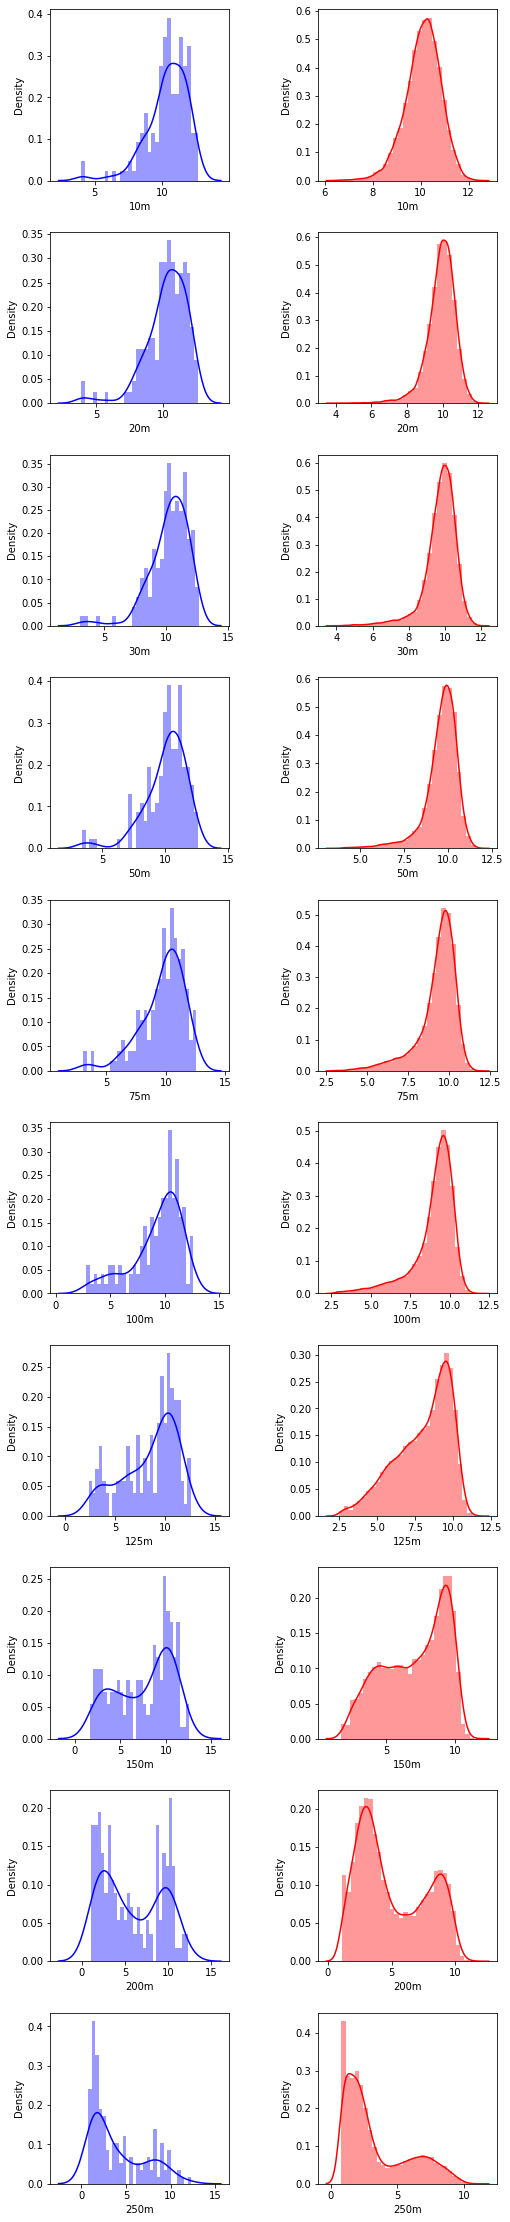

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_FEB[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot  

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

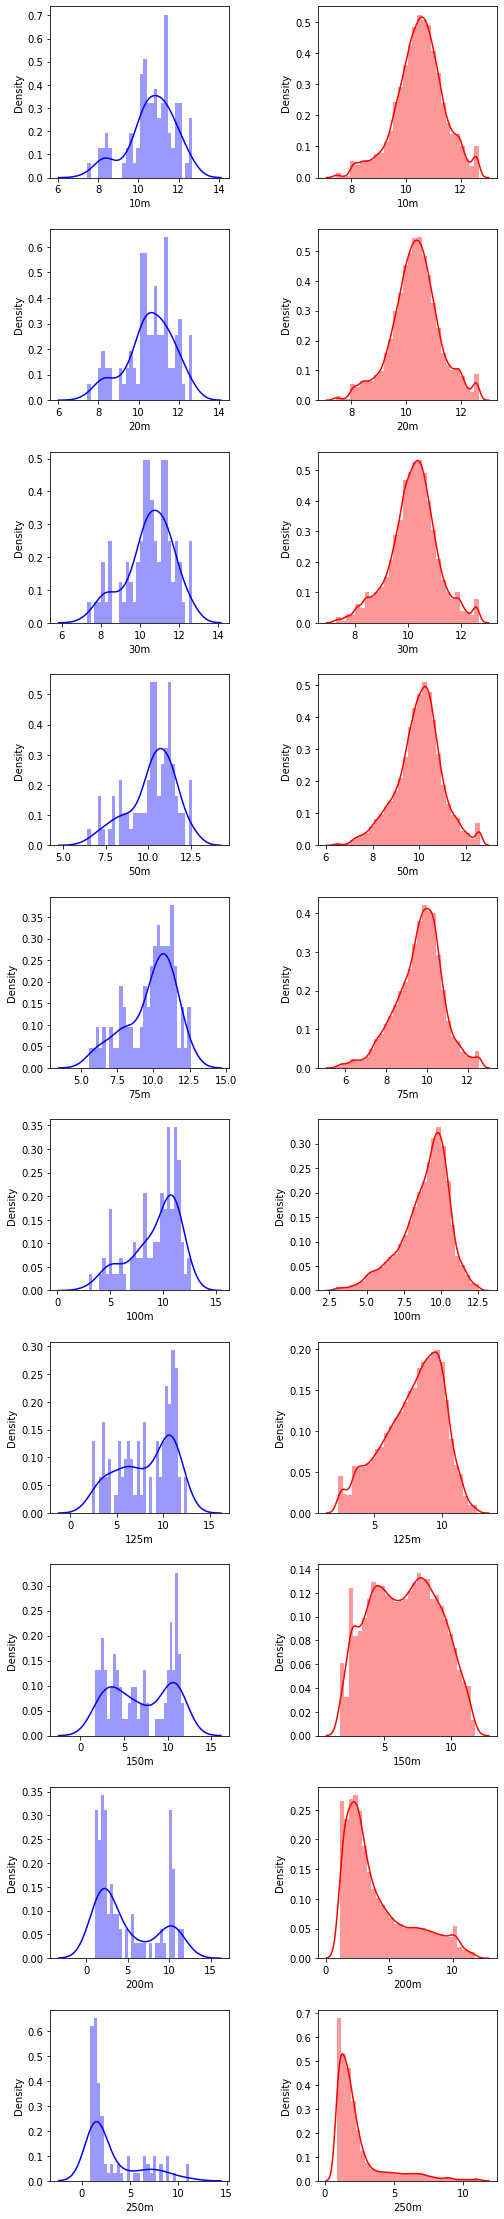

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_FEB[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='blue')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_df_FEB[depth],bins=30,kde=True, ax=axes[index, 1],color='red',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

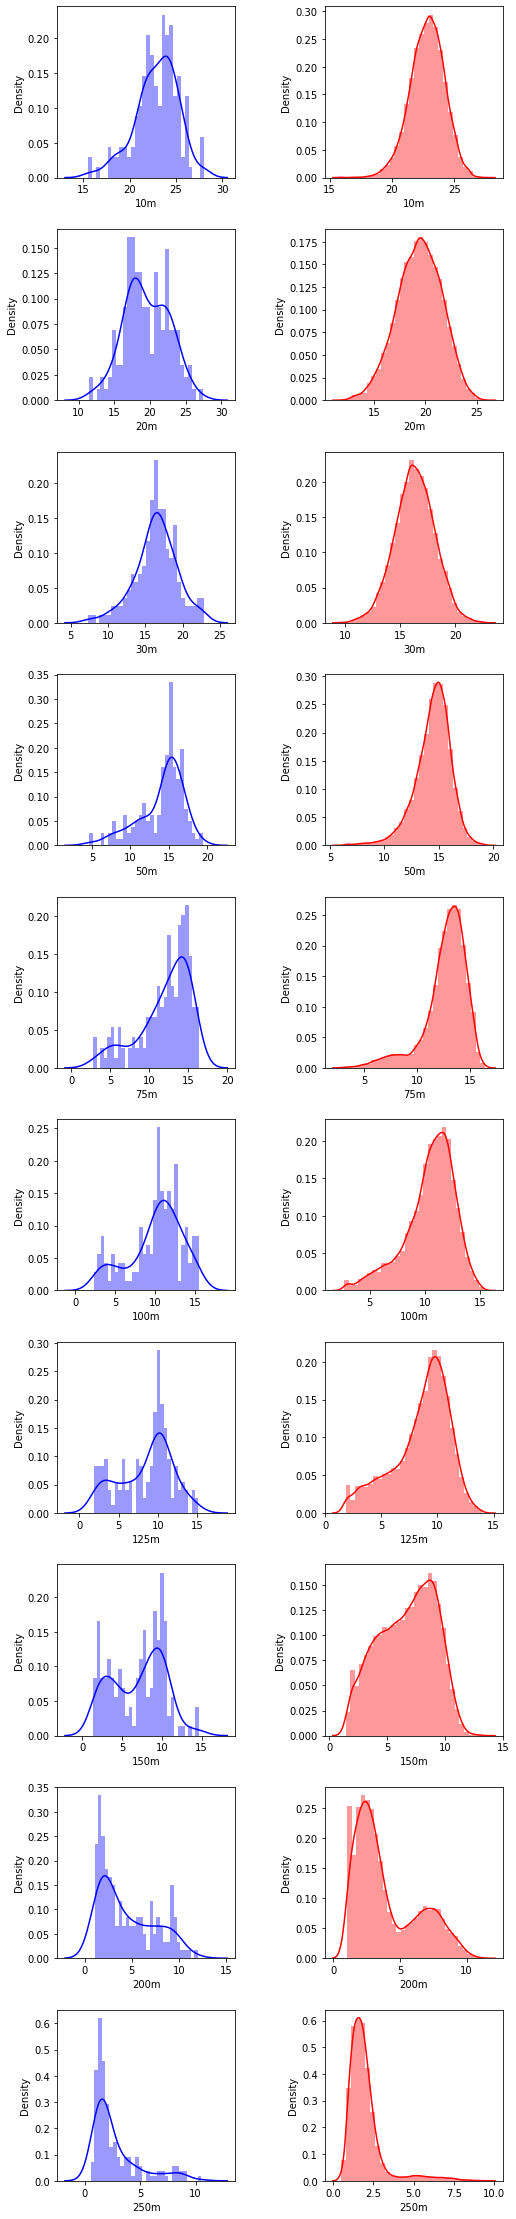

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_AUG[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_AUG[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

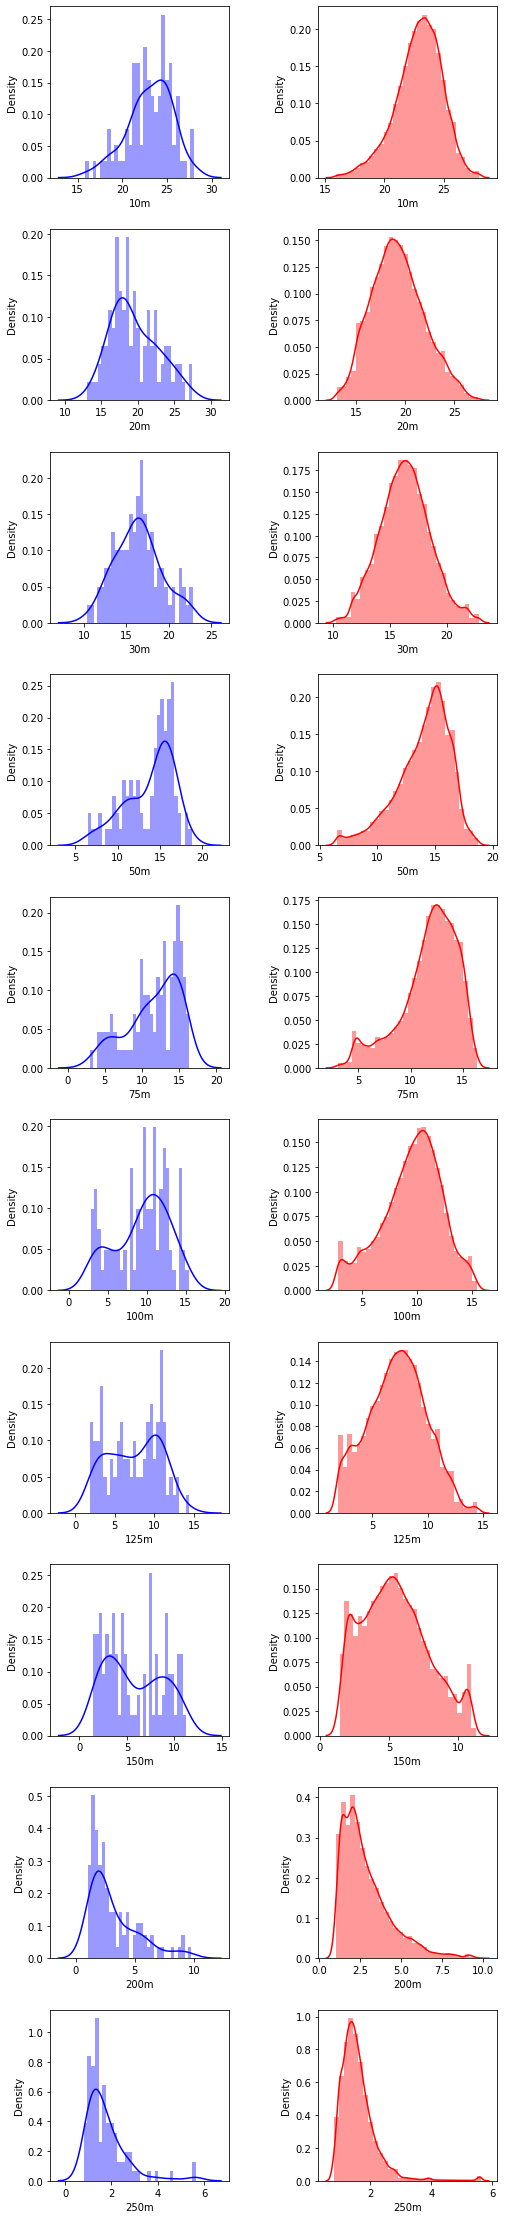

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_AUG[depth],bins=30,kde=True,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_df_AUG[depth],bins=30,kde=True, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


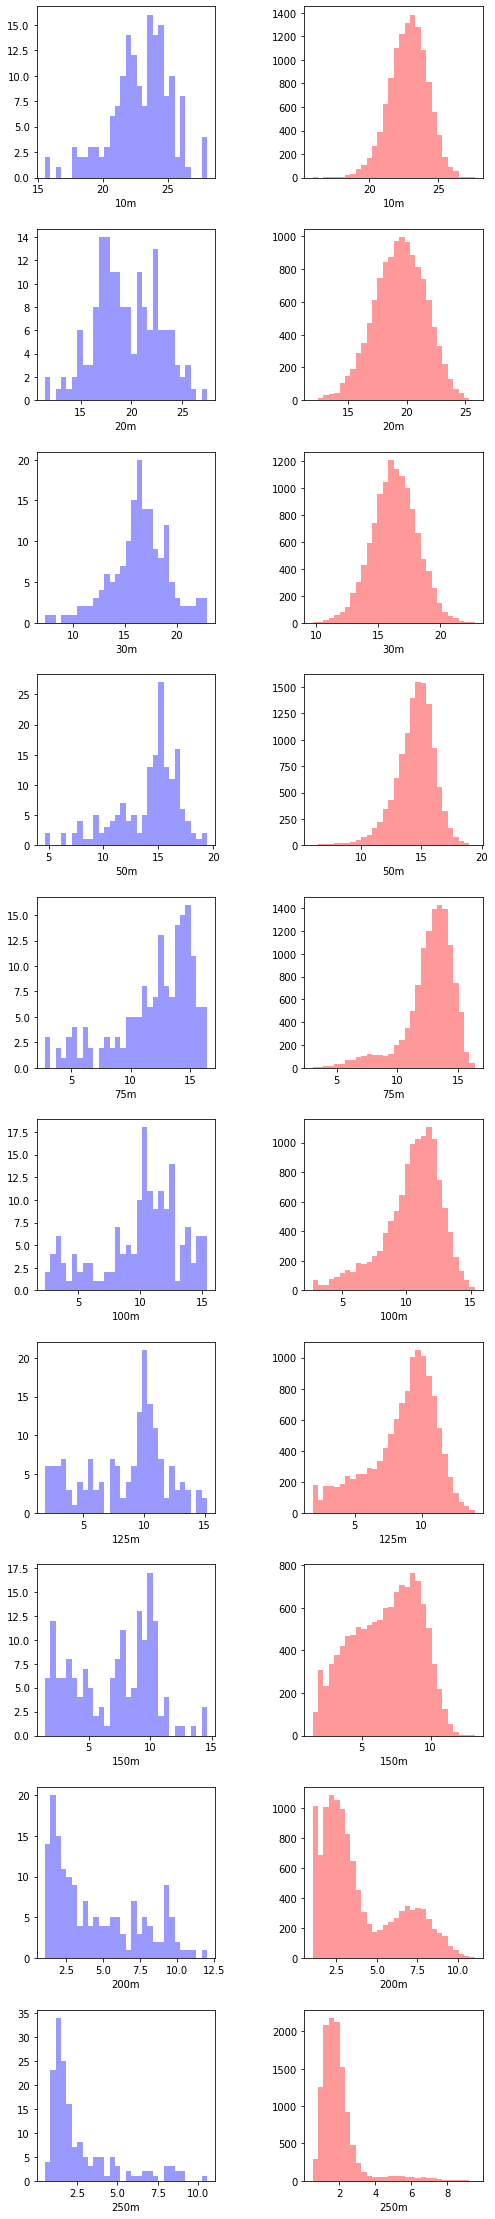

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

index=0
f,axes=plt.subplots(10,2, figsize=(8,40))
plt.subplots_adjust(hspace = 0.3,wspace=0.5)
for depth in ['10','20','30','50','75','100','125','150','200','250']:
    #reshape_ocean_df_1965_FEB[[depth]].hist(bins=50,grid=False, xlabelsize=12, ylabelsize=12)
    #plt.xlabel("Temperature (C)", fontsize=15)
    #plt.ylabel("Frequency",fontsize=15)
    #plt.title('Orignial Dataset Depth:'+depth+'m')
    ax=sns.distplot(reshape_ocean_df_1965_AUG[depth],bins=30,kde=False,ax=axes[index,0],axlabel=depth+'m',color='b')
    #plt.title('Model Dataset Depth:'+depth+'m')
    ax=sns.distplot(model_output_1965_AUG[depth],bins=30,kde=False, ax=axes[index, 1],color='r',axlabel=depth+'m')
    #sns.distplot(reshape_ocean_df_1965_FEB[depth],bins=30,kde=False,ax=axes[index,0])
    #sns.distplot(model_output_df_FEB[depth],bins=30,kde=False, ax=axes[index,1])
    #plt.show()
    index=index+1;
    #sns.distplot(reshape_ocean_df_1965_FEB[depth], kde=False, color='red', bins=30)
    #create seaborn barplot
    

In [42]:
reshape_ocean_df_1965_FEB=reshape_ocean_df_1965_FEB[(reshape_ocean_df_1965_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_1965_FEB["Station-Point"]=='105-10')]

In [43]:
reshape_ocean_df_1965_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500
235,1973-02-13,104-08,37.0567,130.3117,10.5800,11.8700,11.6700,11.5100,11.2700,10.9100,10.8400,9.2500,8.9400,4.8700,3.7600,2.1800,1.6200,0.6900
241,1974-02-17,104-08,37.0567,130.3117,8.8200,9.3000,9.2500,9.2000,9.2000,9.2000,9.2000,9.2000,9.1000,5.9000,3.5500,2.5000,1.8900,1.3500
247,1975-02-25,104-08,37.0567,130.3117,9.6800,10.4000,10.1100,10.0000,9.7500,7.3200,5.5400,4.0300,3.0000,3.1000,2.4800,2.0000,1.6700,1.4800
253,1976-02-21,104-08,37.0567,130.3117,11.9900,11.3100,11.2000,11.0500,11.0100,10.7200,10.6000,9.4500,7.7200,3.7700,1.6700,1.0100,0.6400,0.5000
259,1977-02-09,104-08,37.0567,130.3117,8.7300,8.8300,8.8300,8.9000,8.9000,8.3000,8.8000,9.0600,8.5200,8.1600,7.1000,3.9700,1.6000,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2006-02-24,105-10,37.5533,130.9317,10.1100,10.0500,10.1000,10.0600,9.9900,9.9900,10.0100,8.1100,5.7900,2.3800,1.4900,1.0800,0.7900,0.6000
2000,2007-02-07,105-10,37.5533,130.9317,11.8998,11.9164,11.9279,11.9238,11.7155,8.7790,6.9343,4.9977,3.6371,1.9140,1.2390,0.9820,0.7380,0.6016
2005,2008-02-19,105-10,37.5533,130.9317,11.3996,11.4092,11.4107,11.4120,11.4139,11.4183,11.4202,11.4217,11.4003,10.3530,3.8348,1.8009,1.0095,0.7568
2010,2009-02-26,105-10,37.5533,130.9317,11.5412,11.5394,10.7714,10.6431,10.4387,10.1166,8.8629,6.3470,4.0303,1.3649,1.1144,0.9038,0.6653,0.4804


In [44]:
reshape_ocean_df_1965_FEB

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500
235,1973-02-13,104-08,37.0567,130.3117,10.5800,11.8700,11.6700,11.5100,11.2700,10.9100,10.8400,9.2500,8.9400,4.8700,3.7600,2.1800,1.6200,0.6900
241,1974-02-17,104-08,37.0567,130.3117,8.8200,9.3000,9.2500,9.2000,9.2000,9.2000,9.2000,9.2000,9.1000,5.9000,3.5500,2.5000,1.8900,1.3500
247,1975-02-25,104-08,37.0567,130.3117,9.6800,10.4000,10.1100,10.0000,9.7500,7.3200,5.5400,4.0300,3.0000,3.1000,2.4800,2.0000,1.6700,1.4800
253,1976-02-21,104-08,37.0567,130.3117,11.9900,11.3100,11.2000,11.0500,11.0100,10.7200,10.6000,9.4500,7.7200,3.7700,1.6700,1.0100,0.6400,0.5000
259,1977-02-09,104-08,37.0567,130.3117,8.7300,8.8300,8.8300,8.9000,8.9000,8.3000,8.8000,9.0600,8.5200,8.1600,7.1000,3.9700,1.6000,0.8300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,2006-02-24,105-10,37.5533,130.9317,10.1100,10.0500,10.1000,10.0600,9.9900,9.9900,10.0100,8.1100,5.7900,2.3800,1.4900,1.0800,0.7900,0.6000
2000,2007-02-07,105-10,37.5533,130.9317,11.8998,11.9164,11.9279,11.9238,11.7155,8.7790,6.9343,4.9977,3.6371,1.9140,1.2390,0.9820,0.7380,0.6016
2005,2008-02-19,105-10,37.5533,130.9317,11.3996,11.4092,11.4107,11.4120,11.4139,11.4183,11.4202,11.4217,11.4003,10.3530,3.8348,1.8009,1.0095,0.7568
2010,2009-02-26,105-10,37.5533,130.9317,11.5412,11.5394,10.7714,10.6431,10.4387,10.1166,8.8629,6.3470,4.0303,1.3649,1.1144,0.9038,0.6653,0.4804


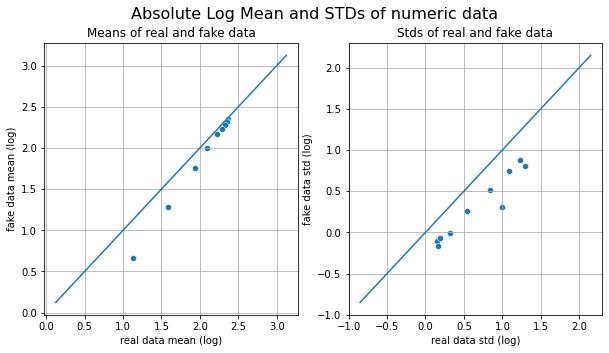

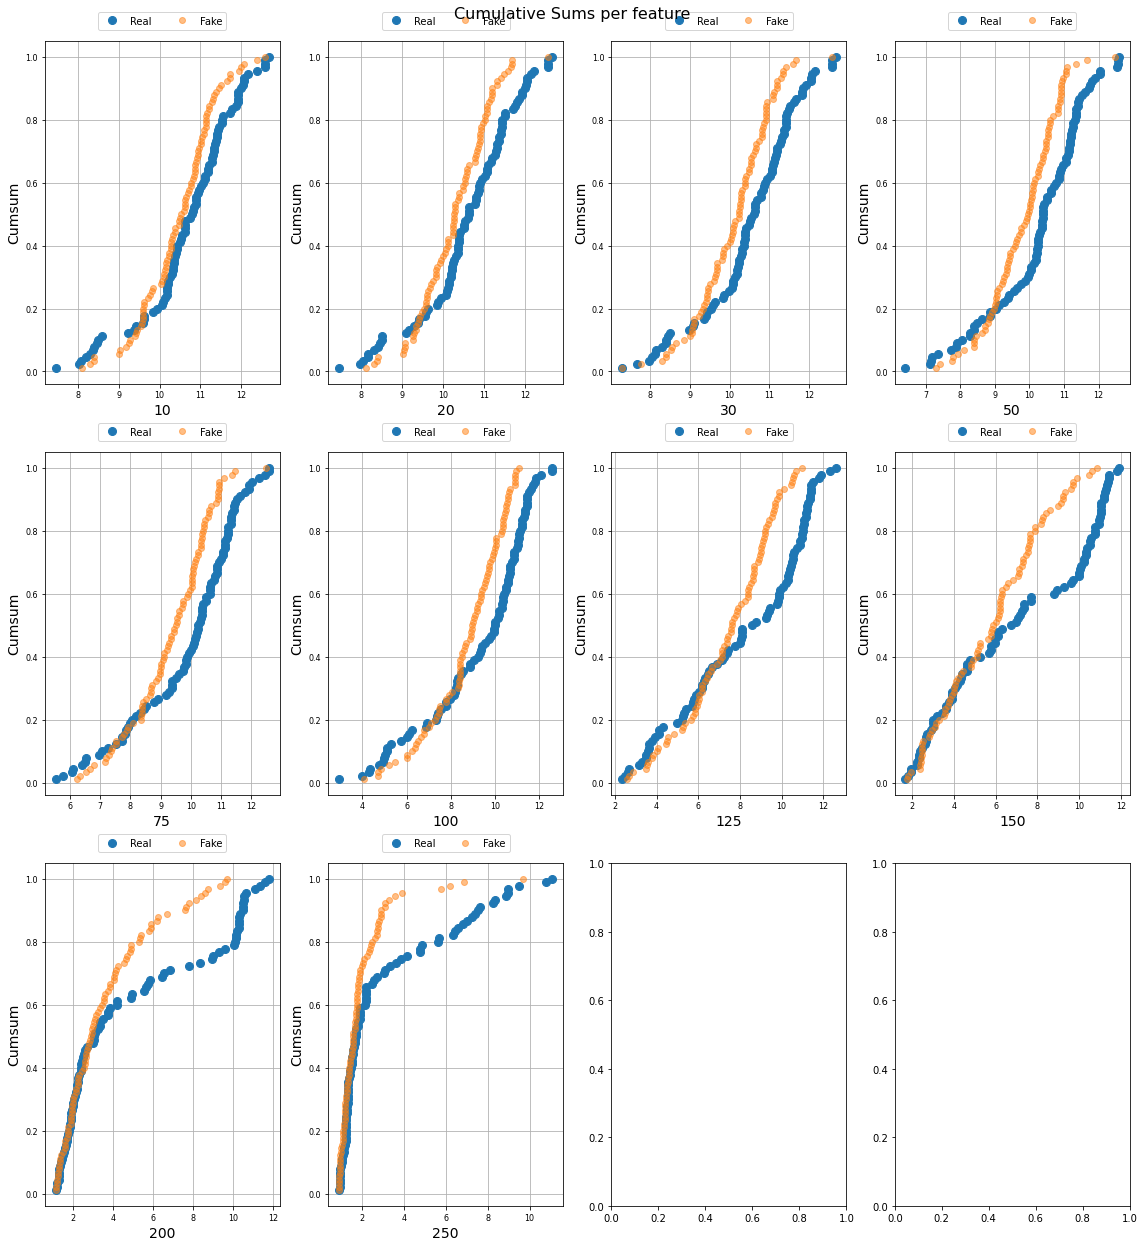

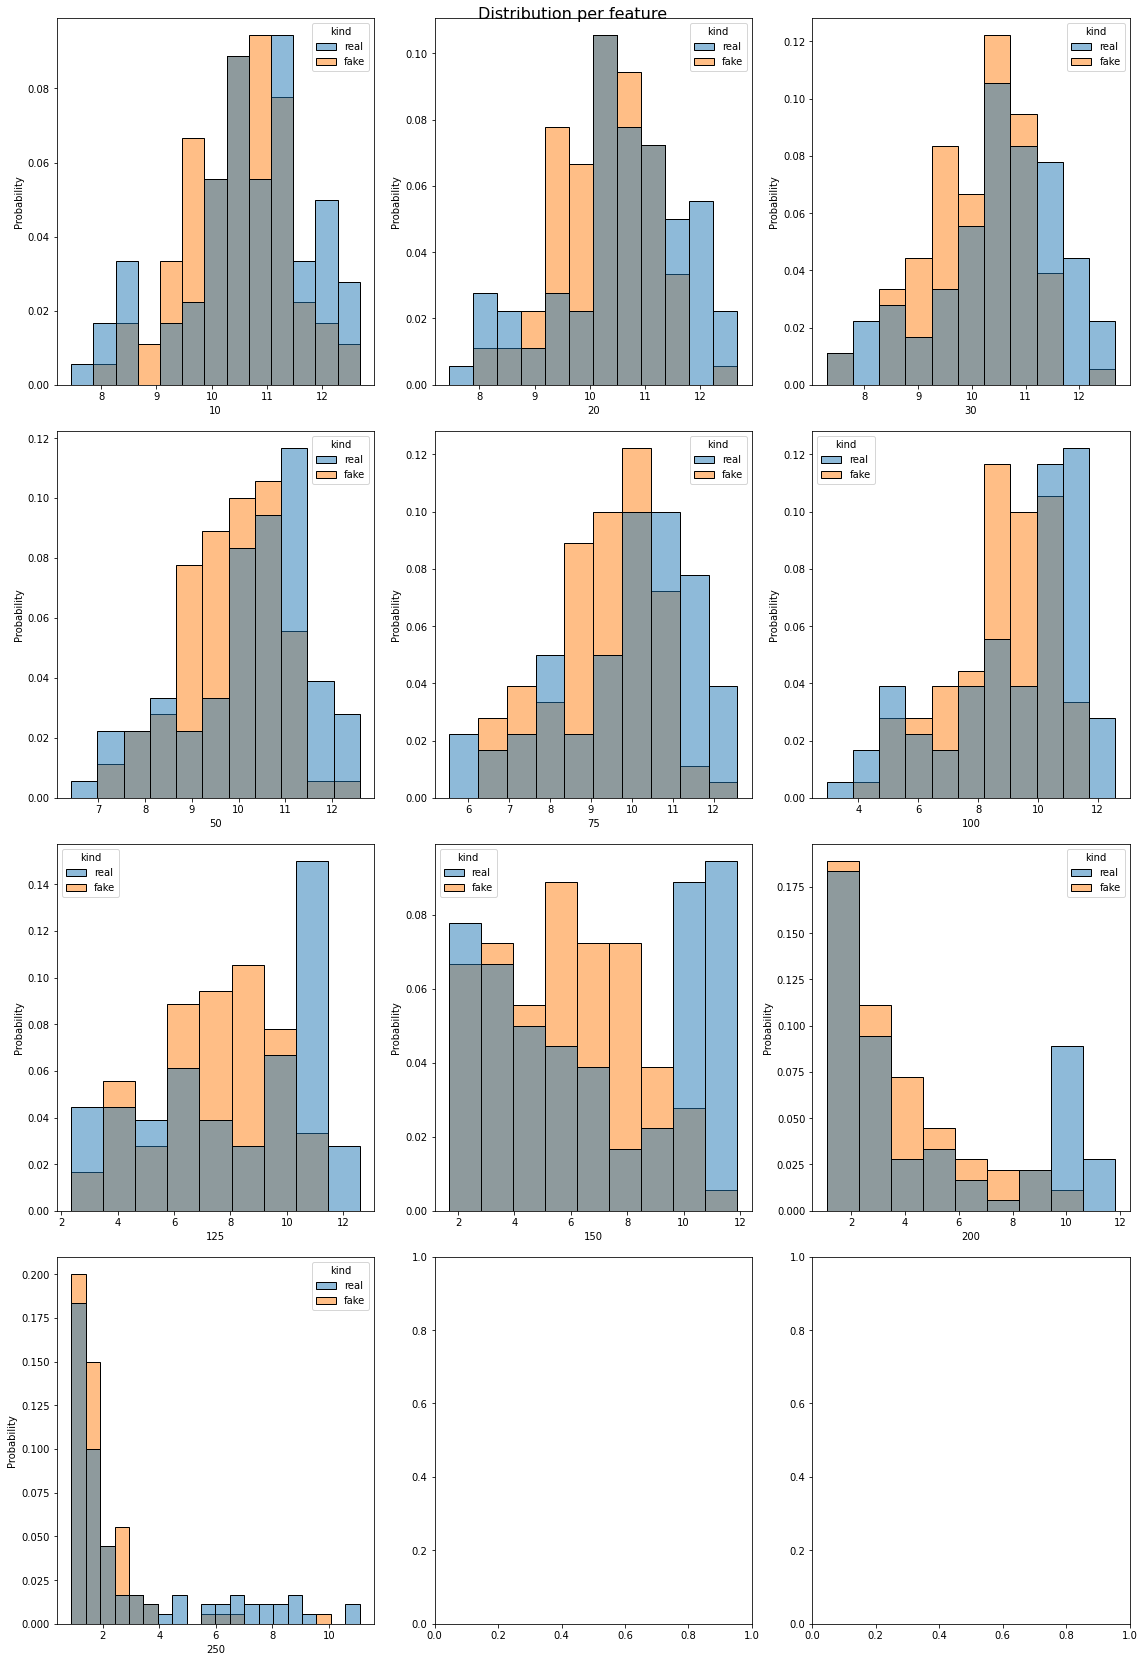

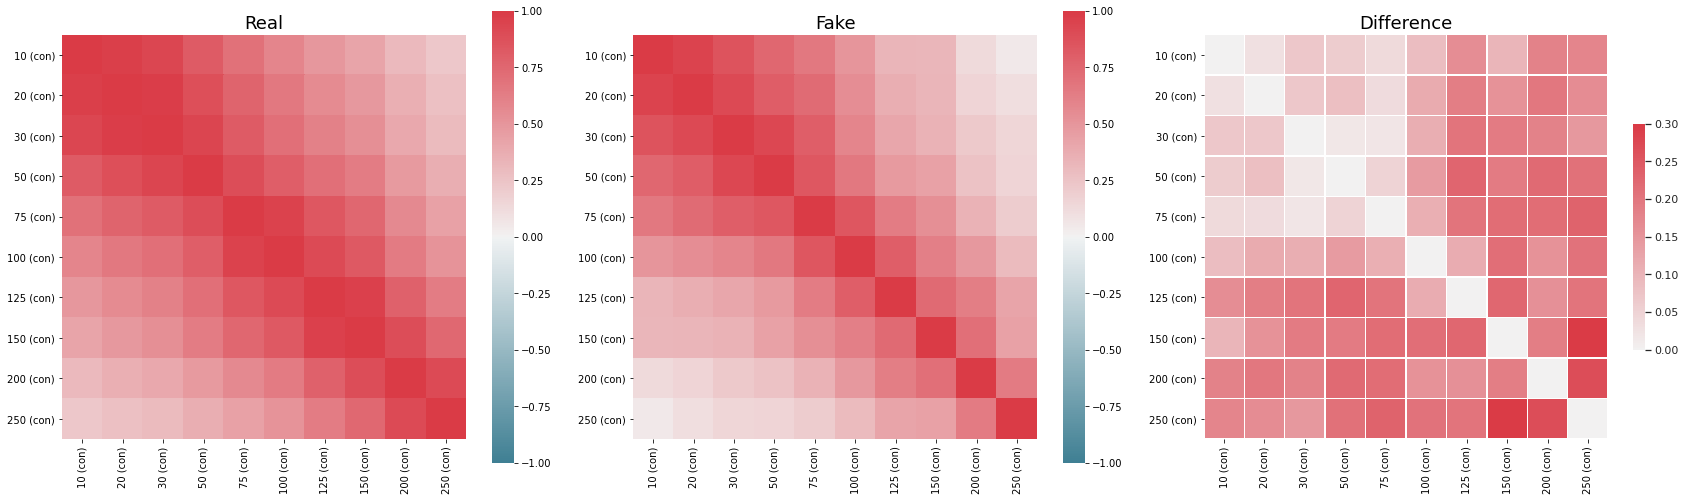

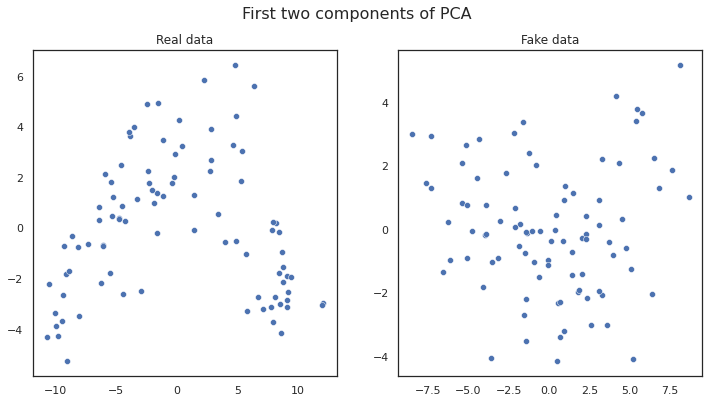

In [45]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_df_FEB[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

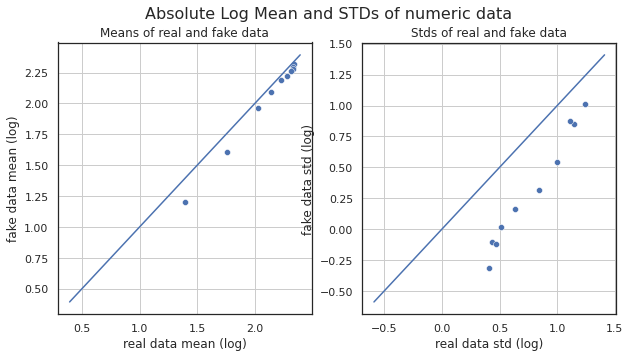

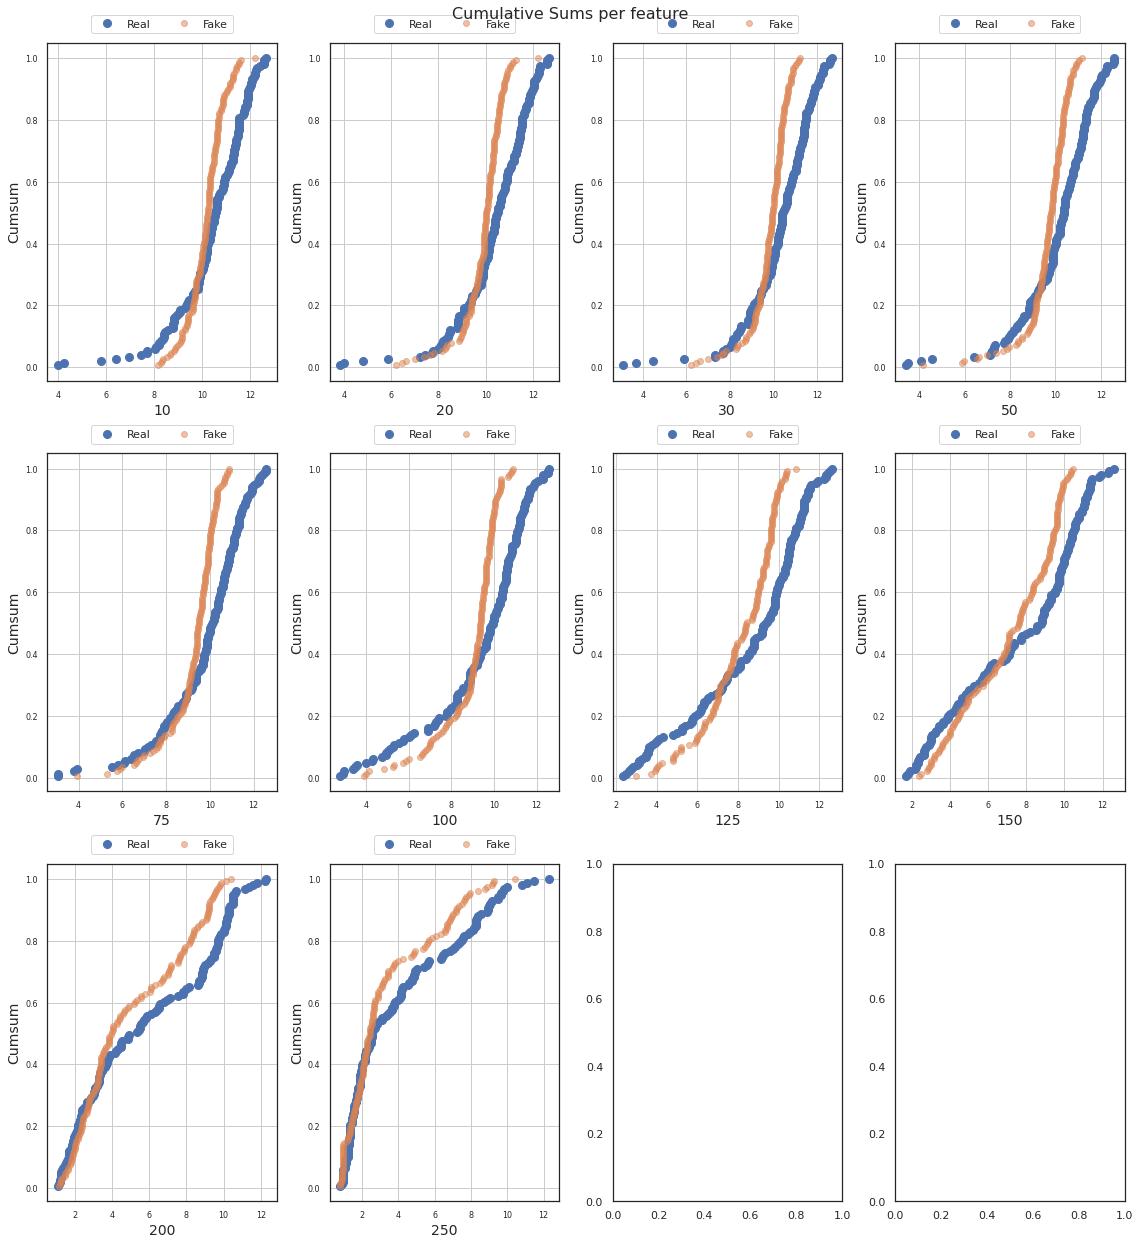

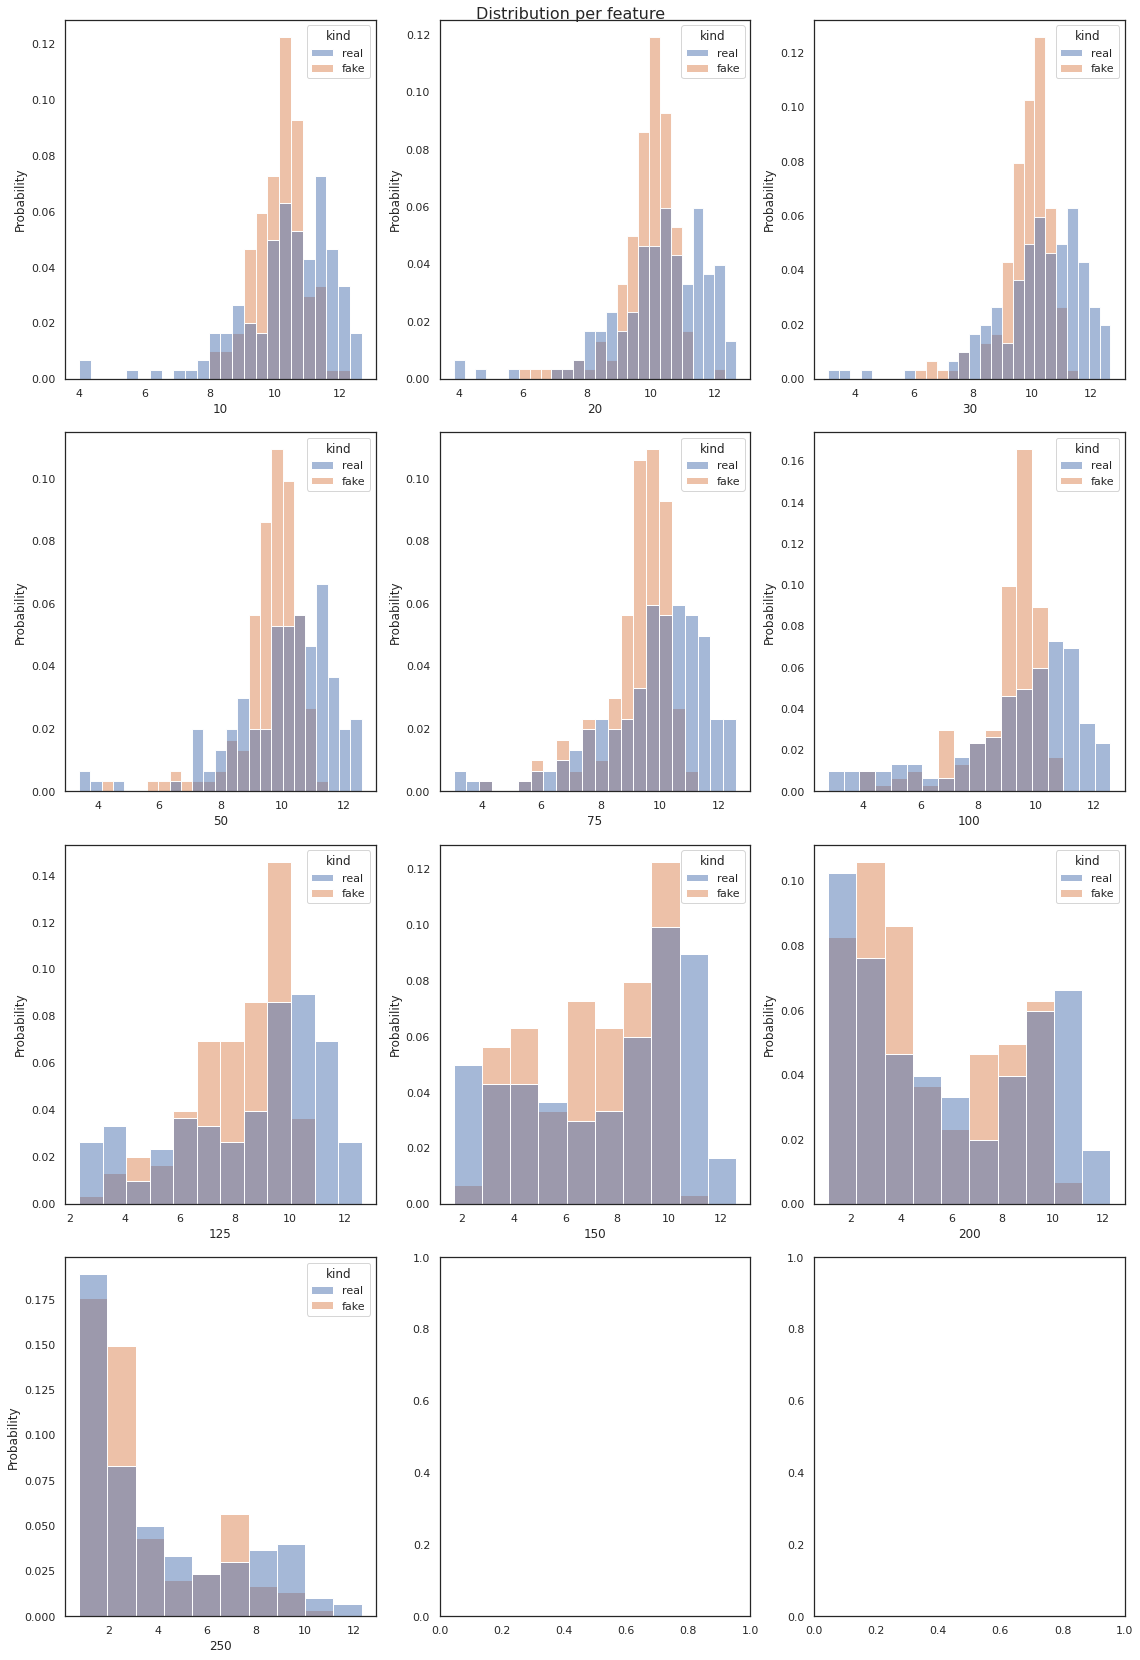

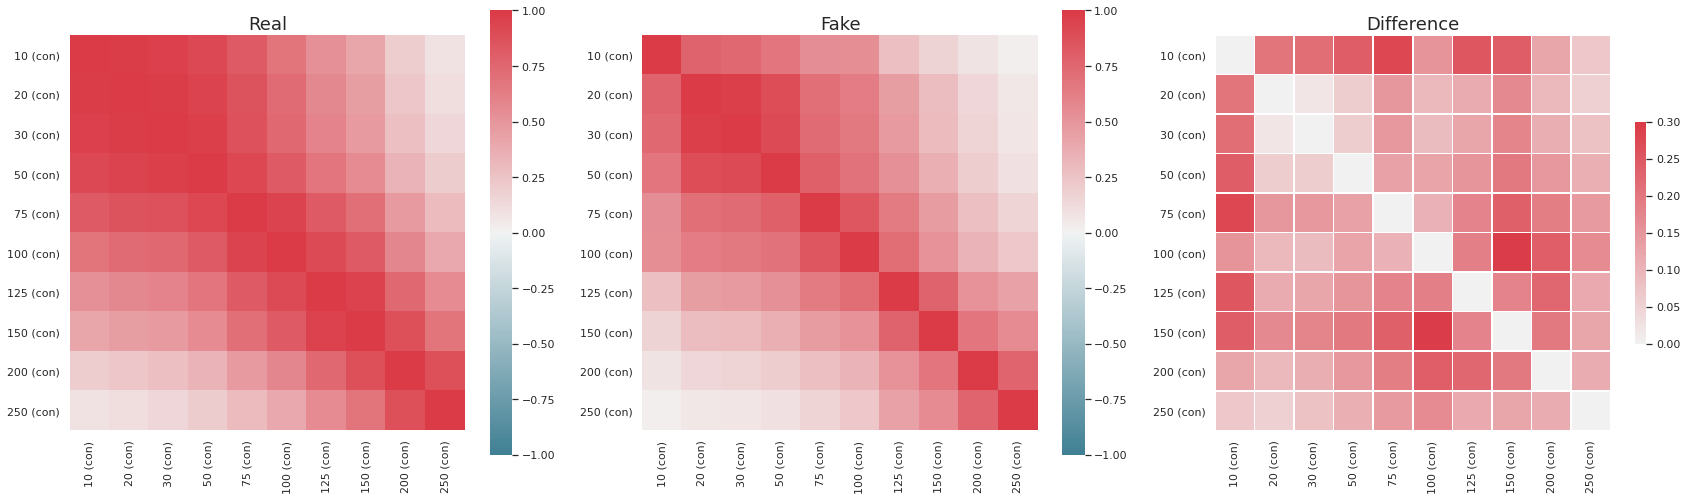

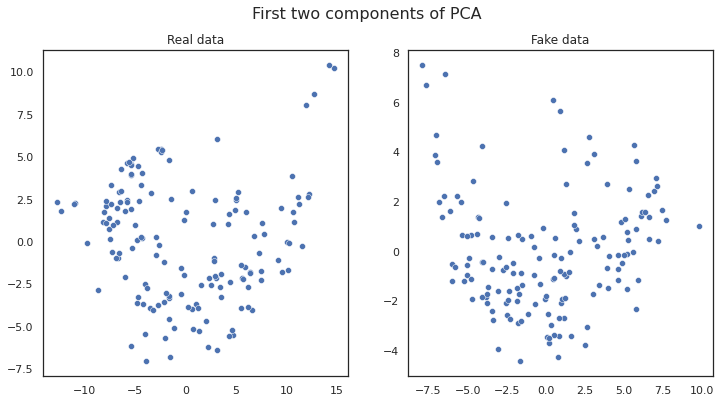

In [46]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_1965_FEB[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_1965_FEB[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

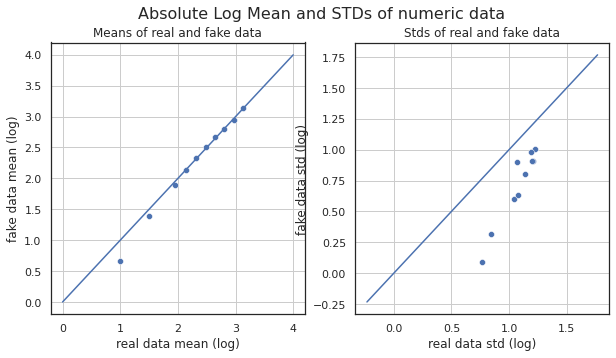

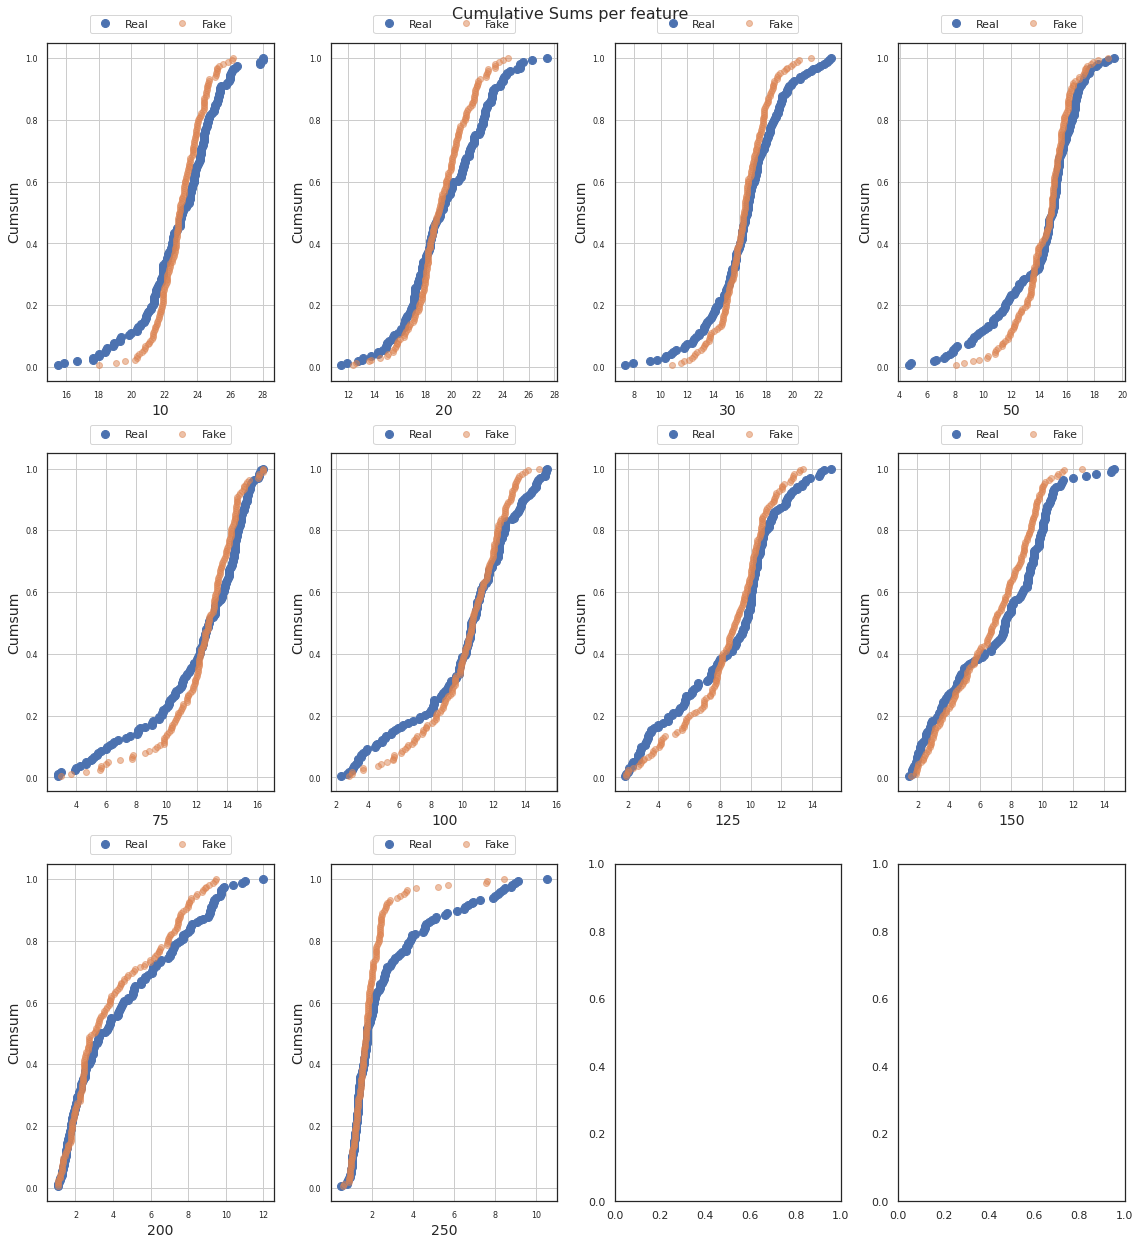

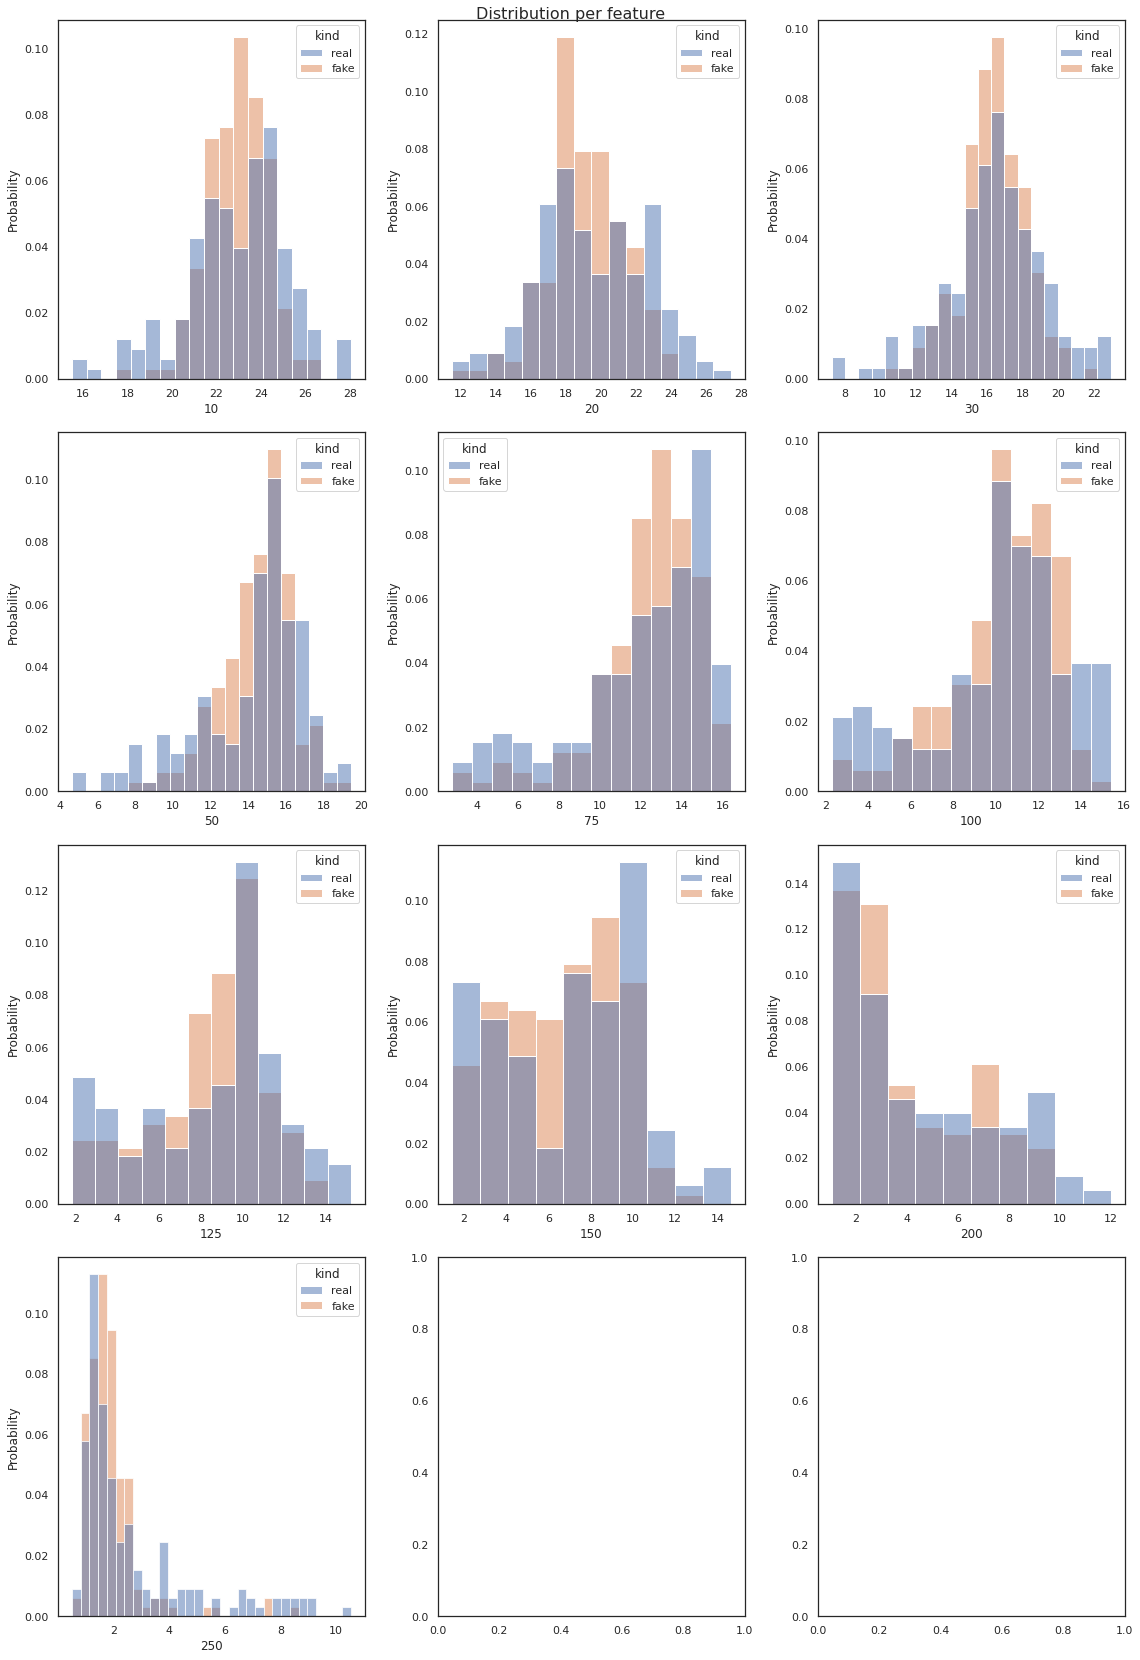

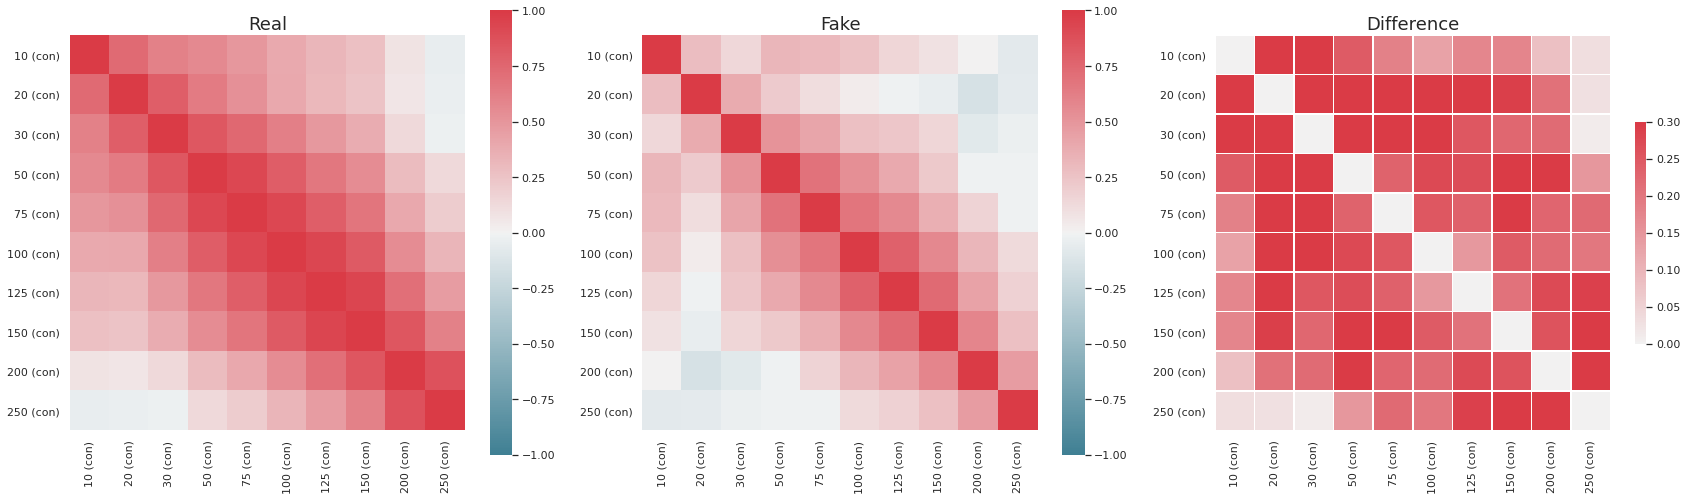

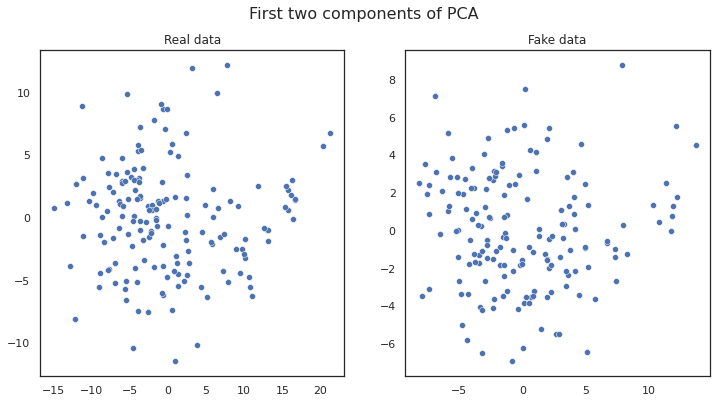

In [47]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_1965_AUG[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_1965_AUG[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

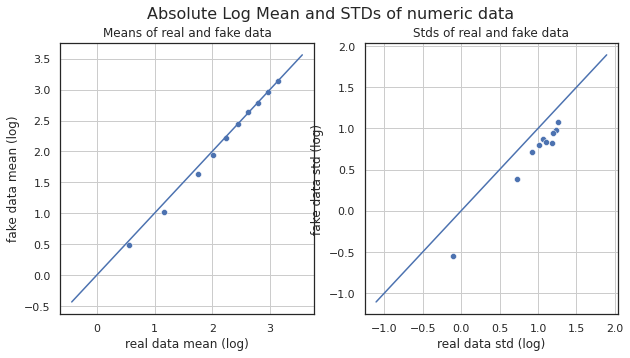

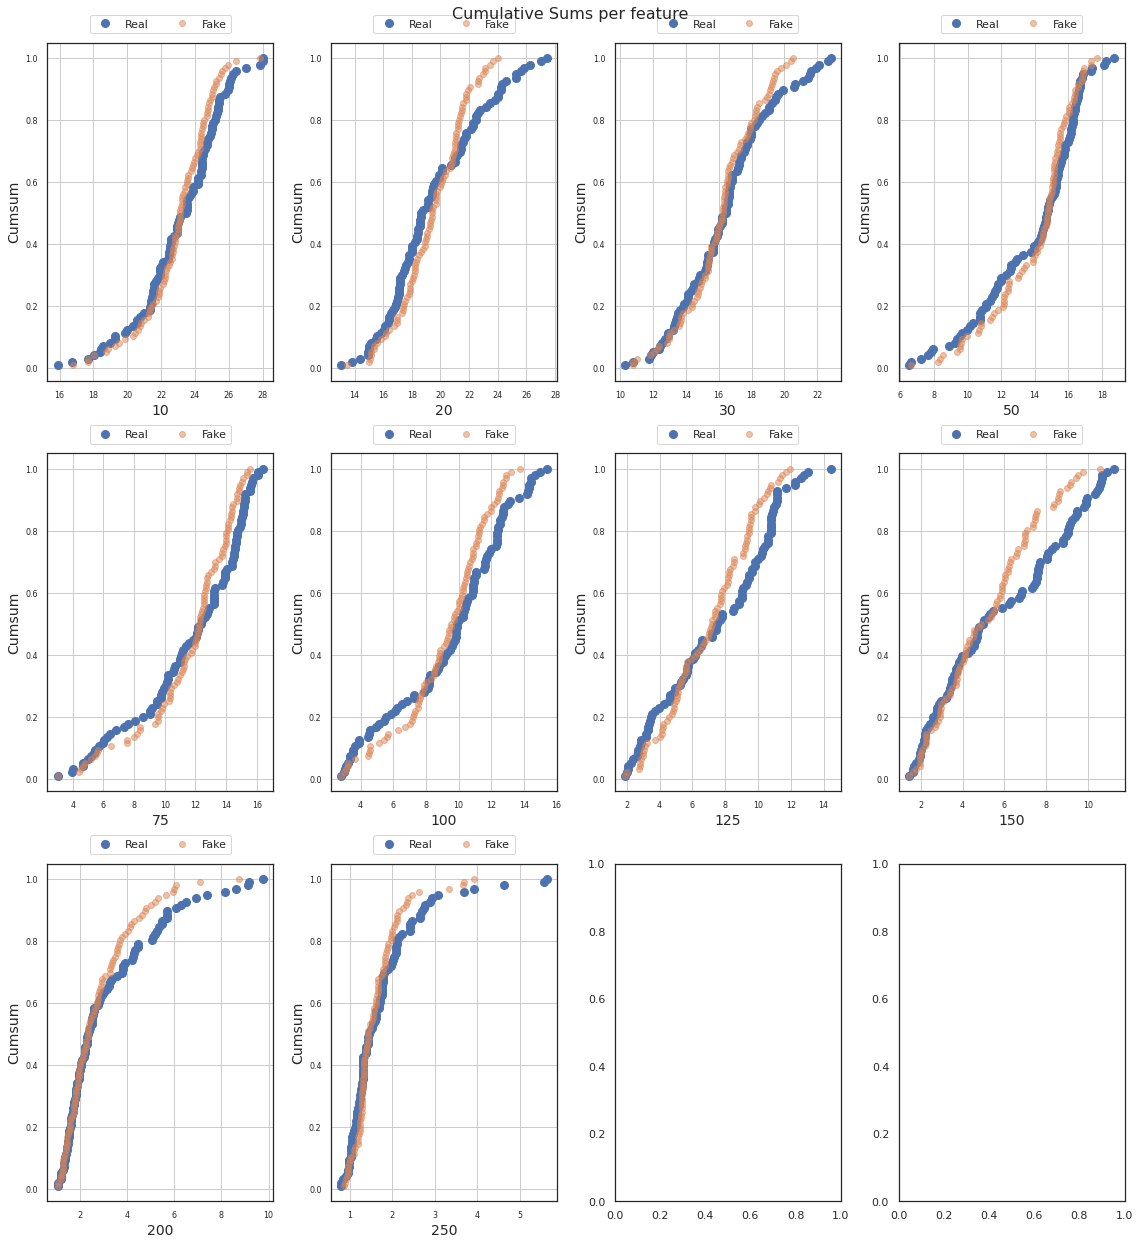

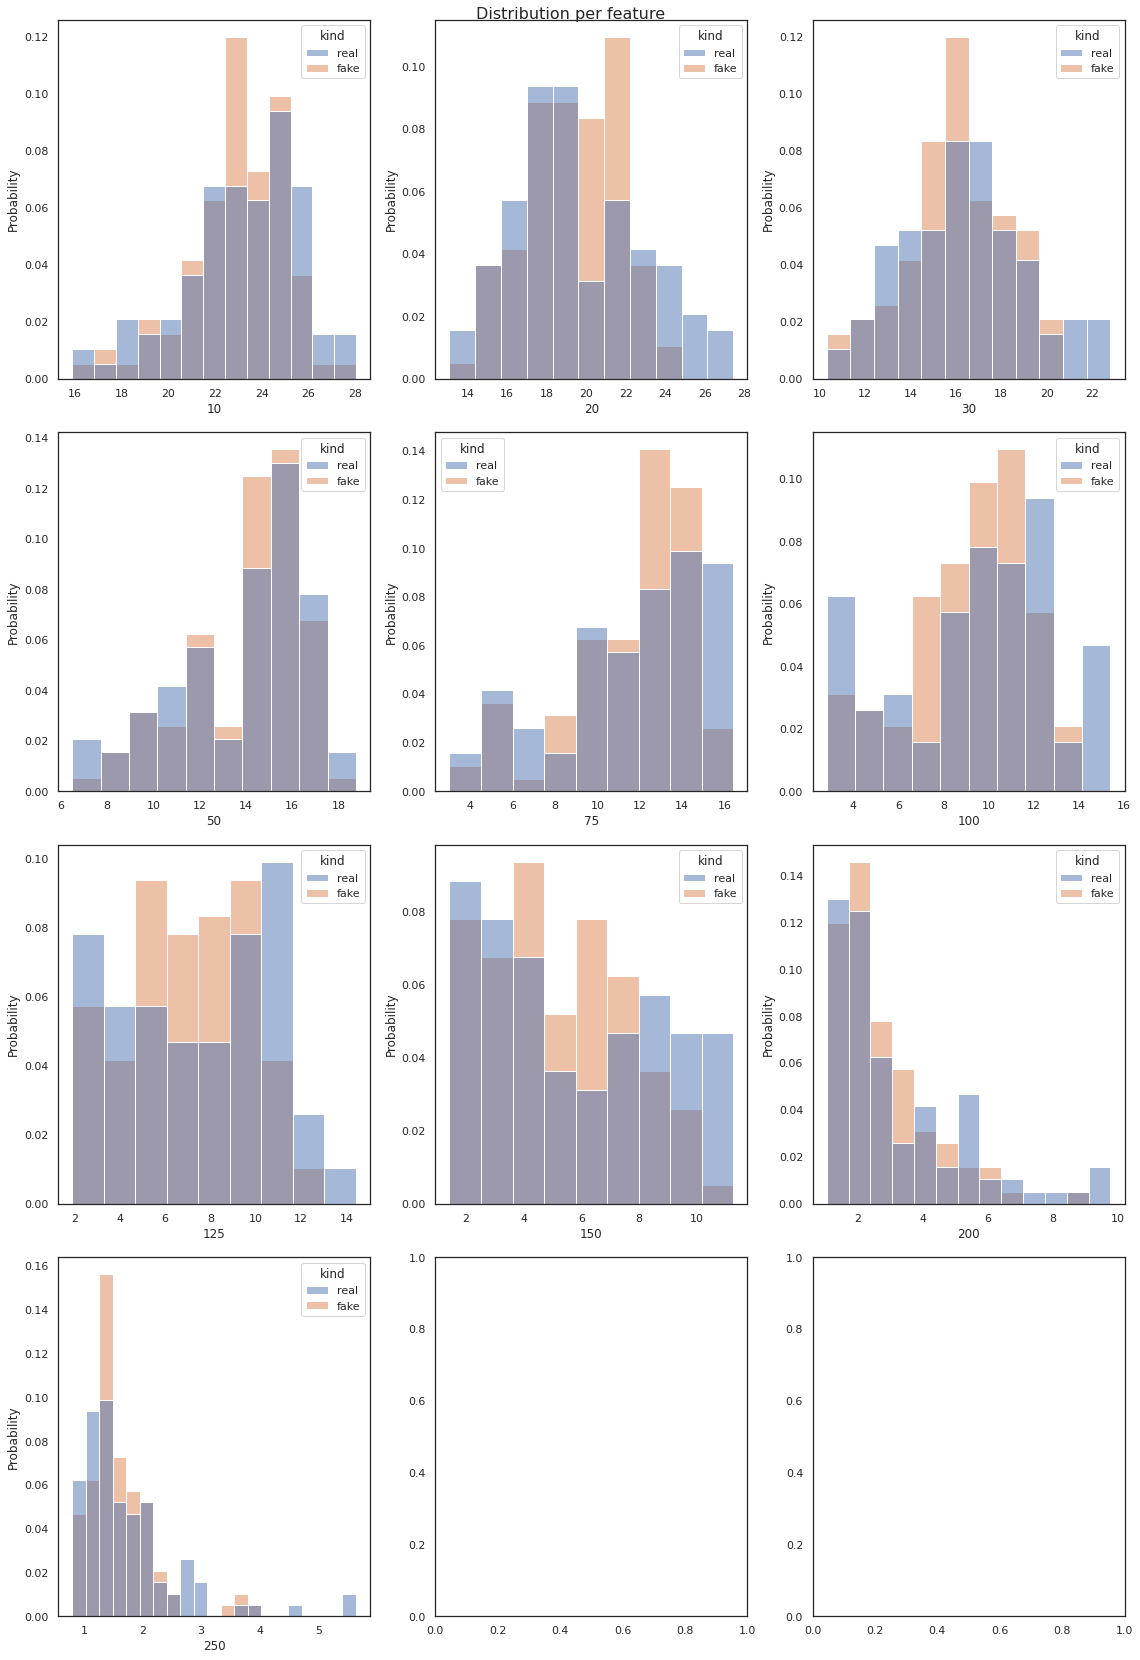

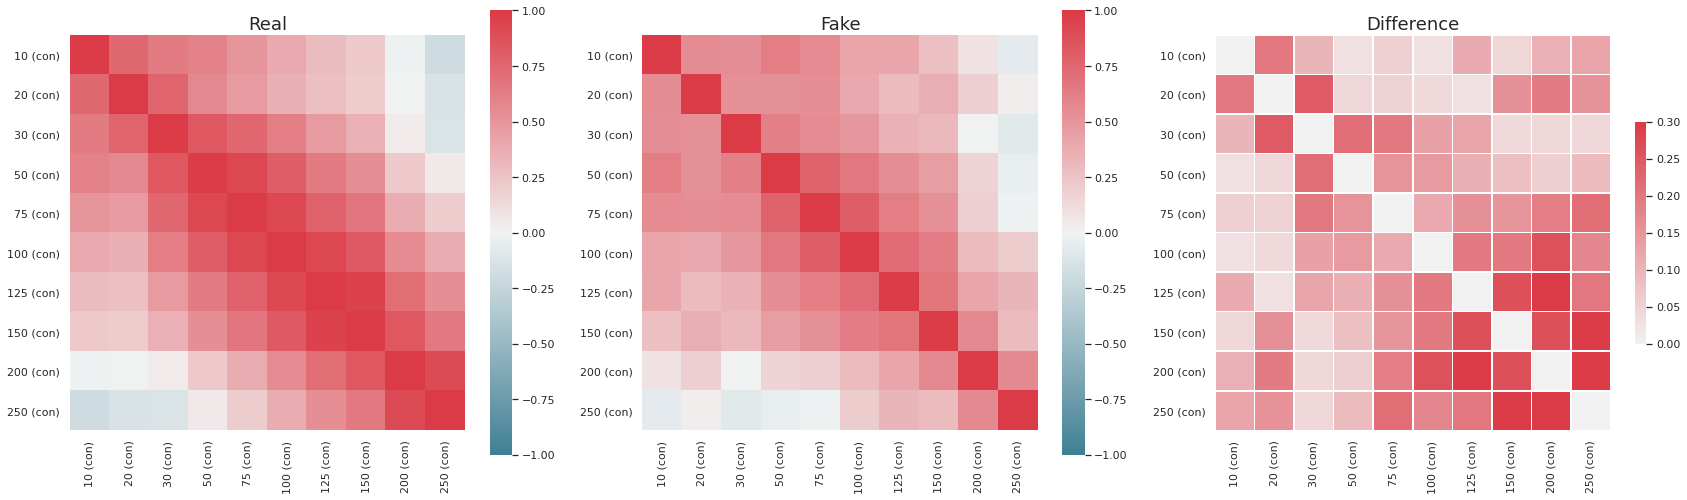

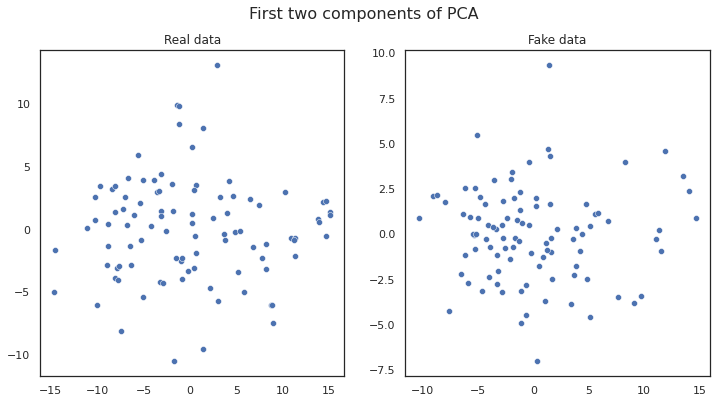

In [48]:
from table_evaluator import load_data, TableEvaluator
#real_data=data_deep
real_data=reshape_ocean_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
synthetic_data=model_output_df_AUG[['10','20','30','50','75','100','125','150','200','250']]
table_evaluator = TableEvaluator(real_data, synthetic_data)
table_evaluator.visual_evaluation()

In [49]:
from sdv.evaluation import evaluate
evaluate(synthetic_data, real_data)
evaluate(synthetic_data, real_data, aggregate=False)

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/home/gi

,metric,name,raw_score,normalized_score,min_value,max_value,goal
1,LogisticDetection,LogisticRegression Detection,0.874823,8.748229e-01,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.558802,5.588021e-01,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-32.739773,6.043622e-15,-inf,inf,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.869346,8.693458e-01,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.869346,8.693458e-01,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.325019,3.250186e-01,0.0,1.0,MAXIMIZE


In [50]:
from sdv.metrics.tabular import CSTest, KSTest
CSTest.compute(real_data, synthetic_data)
evaluate(synthetic_data, real_data, metrics=['CSTest', 'KSTest'])

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)


0.8693458333333333

In [51]:
reshape_ocean_df_AUG

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
138,1993-08-17,104-08,37.0567,130.3117,18.8900,18.4100,15.8800,15.7800,6.5000,4.6600,3.0600,2.7000,2.1800,1.6700,1.2900,1.0500,0.7700,0.5200,0.4060
144,1994-08-19,104-08,37.0567,130.3117,25.7500,25.4800,25.3000,12.9000,9.9600,5.7000,3.3500,2.7000,2.6000,2.5400,1.9000,1.8500,1.1800,0.7200,0.5228
149,1995-08-10,104-08,37.0567,130.3117,23.2800,22.4600,18.8000,17.0900,15.2500,13.1900,11.5300,10.7700,9.9000,5.1900,2.9300,1.6700,0.9000,0.6000,0.5955
155,1996-08-04,104-08,37.0567,130.3117,24.3000,21.9500,14.9100,12.0100,7.9500,5.2200,3.5600,2.2800,1.6500,1.0700,0.8000,0.6600,0.4900,0.3900,0.4849
161,1997-08-27,104-08,37.0567,130.3117,25.3400,25.3100,21.7500,15.8800,11.1200,5.9800,3.5500,2.6500,1.9700,1.2100,0.9800,0.8200,0.5900,0.4600,0.5744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2005-08-27,105-10,37.5533,130.9317,23.6000,21.4900,13.8100,14.4400,14.1800,9.4900,9.0700,6.3500,3.5800,1.9500,1.3200,1.0100,0.7500,0.5900,0.5689
1235,2007-08-18,105-10,37.5533,130.9317,25.1272,24.4056,18.6154,17.1784,16.2491,14.3622,9.8155,5.8000,3.3630,2.2133,1.4420,1.1182,0.7974,0.6283,0.7262
1240,2008-08-08,105-10,37.5533,130.9317,24.3763,21.4293,18.4085,17.3594,14.6429,12.4263,9.5962,6.5793,4.7418,1.7158,1.1526,1.0041,0.7343,0.5953,0.5907
1251,2011-08-27,105-10,37.5533,130.9317,24.3940,21.9261,15.5282,13.4058,10.1430,9.0289,7.2604,5.3188,2.7915,2.3379,1.7621,1.2631,0.9363,0.7449,0.6000


In [52]:
reshape_ocean_df_AUG

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
138,1993-08-17,104-08,37.0567,130.3117,18.8900,18.4100,15.8800,15.7800,6.5000,4.6600,3.0600,2.7000,2.1800,1.6700,1.2900,1.0500,0.7700,0.5200,0.4060
144,1994-08-19,104-08,37.0567,130.3117,25.7500,25.4800,25.3000,12.9000,9.9600,5.7000,3.3500,2.7000,2.6000,2.5400,1.9000,1.8500,1.1800,0.7200,0.5228
149,1995-08-10,104-08,37.0567,130.3117,23.2800,22.4600,18.8000,17.0900,15.2500,13.1900,11.5300,10.7700,9.9000,5.1900,2.9300,1.6700,0.9000,0.6000,0.5955
155,1996-08-04,104-08,37.0567,130.3117,24.3000,21.9500,14.9100,12.0100,7.9500,5.2200,3.5600,2.2800,1.6500,1.0700,0.8000,0.6600,0.4900,0.3900,0.4849
161,1997-08-27,104-08,37.0567,130.3117,25.3400,25.3100,21.7500,15.8800,11.1200,5.9800,3.5500,2.6500,1.9700,1.2100,0.9800,0.8200,0.5900,0.4600,0.5744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2005-08-27,105-10,37.5533,130.9317,23.6000,21.4900,13.8100,14.4400,14.1800,9.4900,9.0700,6.3500,3.5800,1.9500,1.3200,1.0100,0.7500,0.5900,0.5689
1235,2007-08-18,105-10,37.5533,130.9317,25.1272,24.4056,18.6154,17.1784,16.2491,14.3622,9.8155,5.8000,3.3630,2.2133,1.4420,1.1182,0.7974,0.6283,0.7262
1240,2008-08-08,105-10,37.5533,130.9317,24.3763,21.4293,18.4085,17.3594,14.6429,12.4263,9.5962,6.5793,4.7418,1.7158,1.1526,1.0041,0.7343,0.5953,0.5907
1251,2011-08-27,105-10,37.5533,130.9317,24.3940,21.9261,15.5282,13.4058,10.1430,9.0289,7.2604,5.3188,2.7915,2.3379,1.7621,1.2631,0.9363,0.7449,0.6000


In [53]:
reshape_ocean_df_test_FEB=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB["Station-Point"]=='104-08')|(reshape_ocean_df_test_FEB["Station-Point"]=='104-09')|(reshape_ocean_df_test_FEB["Station-Point"]=='104-10')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-08')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-09')|(reshape_ocean_df_test_FEB["Station-Point"]=='105-10')]
reshape_ocean_df_test_APR=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR["Station-Point"]=='104-08')|(reshape_ocean_df_test_APR["Station-Point"]=='104-09')|(reshape_ocean_df_test_APR["Station-Point"]=='104-10')|(reshape_ocean_df_test_APR["Station-Point"]=='105-08')|(reshape_ocean_df_test_APR["Station-Point"]=='105-09')|(reshape_ocean_df_test_APR["Station-Point"]=='105-10')]
reshape_ocean_df_test_JUN=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN["Station-Point"]=='104-08')|(reshape_ocean_df_test_JUN["Station-Point"]=='104-09')|(reshape_ocean_df_test_JUN["Station-Point"]=='104-10')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-08')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-09')|(reshape_ocean_df_test_JUN["Station-Point"]=='105-10')]
reshape_ocean_df_test_AUG=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG["Station-Point"]=='104-08')|(reshape_ocean_df_test_AUG["Station-Point"]=='104-09')|(reshape_ocean_df_test_AUG["Station-Point"]=='104-10')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-08')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-09')|(reshape_ocean_df_test_AUG["Station-Point"]=='105-10')]
reshape_ocean_df_test_OCT=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT["Station-Point"]=='104-08')|(reshape_ocean_df_test_OCT["Station-Point"]=='104-09')|(reshape_ocean_df_test_OCT["Station-Point"]=='104-10')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-08')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-09')|(reshape_ocean_df_test_OCT["Station-Point"]=='105-10')]
reshape_ocean_df_test_DEC=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC["Station-Point"]=='104-08')|(reshape_ocean_df_test_DEC["Station-Point"]=='104-09')|(reshape_ocean_df_test_DEC["Station-Point"]=='104-10')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-08')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-09')|(reshape_ocean_df_test_DEC["Station-Point"]=='105-10')]

In [54]:
reshape_ocean_df_test_AUG

,DATE,Station-Point,Latitude,Longitude,0,10,20,30,50,75,100,125,150,200,250,300,400,500,SSH
241,2013-08-21,104-08,37.0567,130.3117,25.6300,22.3600,19.3600,18.8500,15.7300,15.2800,13.3000,10.8100,8.8100,4.0800,2.2100,1.5700,1.0500,0.7800,0.7490
247,2014-08-17,104-08,37.0567,130.3117,23.0684,22.9003,20.2744,17.2607,15.4660,13.9266,12.0406,11.0588,10.6135,8.4693,3.2895,1.7430,1.0028,0.7899,0.7889
253,2015-08-10,104-08,37.0567,130.3117,25.3693,22.1631,19.4285,15.8501,14.4375,12.3203,10.9234,10.5503,10.3985,10.1745,7.7892,2.8412,1.1828,0.9189,0.8638
259,2016-08-10,104-08,37.0567,130.3117,29.0423,25.7924,19.1640,18.4105,18.0518,17.0173,15.5209,12.9721,10.2371,5.3840,2.4025,1.4394,1.0276,0.8140,0.8165
265,2017-08-18,104-08,37.0567,130.3117,25.7603,25.6790,19.1014,17.9731,16.5956,16.1917,14.0423,9.8349,6.9032,1.9694,1.3546,1.1249,0.8356,0.7060,0.7079
375,2013-08-21,104-09,37.0567,130.6267,25.2500,22.7400,16.7900,15.7300,14.2400,11.9200,11.0200,10.5200,10.1400,7.8100,5.0200,2.5600,1.1400,0.7900,0.7828
381,2014-08-17,104-09,37.0567,130.6267,23.4470,23.2452,21.6306,16.6375,15.4432,13.4591,11.8898,11.1337,10.8247,10.4033,7.5224,3.1305,1.1788,0.8687,0.8103
387,2015-08-09,104-09,37.0567,130.6267,26.2656,21.6867,14.5527,14.8614,14.0235,11.3582,10.7837,10.5927,10.5103,10.3991,10.1738,7.7766,1.8167,1.0774,0.8922
393,2016-08-10,104-09,37.0567,130.6267,28.0140,26.0565,20.8031,17.8602,16.3205,15.3766,13.2206,11.6606,10.9010,10.0287,4.5675,2.0259,1.1925,0.8870,0.8500
399,2017-08-18,104-09,37.0567,130.6267,25.6520,25.6691,22.5028,18.4104,15.8179,14.6590,12.3466,9.7481,6.5605,2.6386,1.4555,1.1276,0.8449,0.7186,0.7319


In [55]:
# get the dataset
def get_syn_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=model_output_df_FEB[(model_output_df_FEB['Station-Point']==station)&(model_output_df_FEB['DATE'].str.contains("-02-"))]
    if (season=='APR') : temp=model_output_df_APR[(model_output_df_APR['Station-Point']==station)&(model_output_df_APR['DATE'].str.contains("-04-"))]
    if (season=='JUN') : temp=model_output_df_JUN[(model_output_df_JUN['Station-Point']==station)&(model_output_df_JUN['DATE'].str.contains("-06-"))]
    if (season=='AUG') : temp=model_output_df_AUG[(model_output_df_AUG['Station-Point']==station)&(model_output_df_AUG['DATE'].str.contains("-08-"))]
    if (season=='OCT') : temp=model_output_df_OCT[(model_output_df_OCT['Station-Point']==station)&(model_output_df_OCT['DATE'].str.contains("-10-"))]
    if (season=='DEC') : temp=model_output_df_DEC[(model_output_df_DEC['Station-Point']==station)&(model_output_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [56]:
# get the dataset
def get_org_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_APR[(reshape_ocean_df_APR['Station-Point']==station)&(reshape_ocean_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_JUN[(reshape_ocean_df_JUN['Station-Point']==station)&(reshape_ocean_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_AUG[(reshape_ocean_df_AUG['Station-Point']==station)&(reshape_ocean_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_OCT[(reshape_ocean_df_OCT['Station-Point']==station)&(reshape_ocean_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_DEC[(reshape_ocean_df_DEC['Station-Point']==station)&(reshape_ocean_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [57]:
# get the dataset
def get_date_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_APR[(reshape_ocean_df_APR['Station-Point']==station)&(reshape_ocean_df_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_JUN[(reshape_ocean_df_JUN['Station-Point']==station)&(reshape_ocean_df_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_AUG[(reshape_ocean_df_AUG['Station-Point']==station)&(reshape_ocean_df_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_OCT[(reshape_ocean_df_OCT['Station-Point']==station)&(reshape_ocean_df_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_DEC[(reshape_ocean_df_DEC['Station-Point']==station)&(reshape_ocean_df_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['Station-Point','DATE']]
    #y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X

In [58]:
X, y = get_syn_dataset("104-08","FEB")

In [59]:
y

,10,20,30,50,75,100,125,150,200,250
0,10.8755,10.8755,10.8755,10.6618,10.6618,10.3625,8.1930,4.1387,2.6249,0.9481
1,11.1706,11.0240,11.0170,10.9680,10.9680,10.5681,8.7312,8.7312,1.8846,1.8846
2,11.0491,9.6739,9.4599,9.1508,9.1508,9.1508,8.4470,8.4470,8.4470,2.9062
3,12.0325,12.0325,12.0325,12.0325,11.6104,11.0502,10.7166,10.6898,3.4589,3.4589
4,10.6748,10.6748,10.6748,10.6748,10.6748,10.6748,10.6392,7.8694,2.9091,2.9091
...,...,...,...,...,...,...,...,...,...,...
3995,10.2622,10.2622,9.7006,9.7006,9.7006,9.7006,9.7006,9.7006,9.7006,6.4173
3996,11.0221,10.0775,10.0775,10.0775,10.0775,10.0775,10.0775,10.0775,10.0775,7.8771
3997,10.1857,10.1857,10.1857,8.7076,8.7076,8.7076,8.7076,8.7076,1.8337,1.2049
3998,9.9149,9.9149,9.9149,9.4577,9.4577,5.5868,3.4582,3.4582,1.5012,0.9477


In [60]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [61]:
# get a list of models to evaluate
def get_models():
    models=dict()
    models['knn']=MultiOutputRegressor(KNeighborsRegressor())
#    models['cart']=MultiOutputRegressor(DecisionTreeRegressor())
    models['svm']=MultiOutputRegressor(LinearSVR())
    models['rf']=MultiOutputRegressor(RandomForestRegressor())
    models['lr']=MultiOutputRegressor(LinearRegression())
    return models

In [62]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=42)
    #evaluate the model and collect the results
    scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    return scores

In [63]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=42)
    #evaluate the model and collect the results
    scores1=cross_val_score(model, X, y,scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    scores  = np.sqrt(-1 * scores1)
    return scores

In [64]:
## RMSE-FEB

>knn 2.514 (1.037)
>svm 2.423 (1.309)
>rf 1.353 (0.579)
>lr 1.922 (0.641)


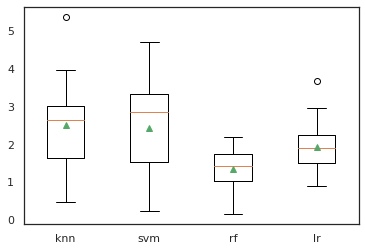

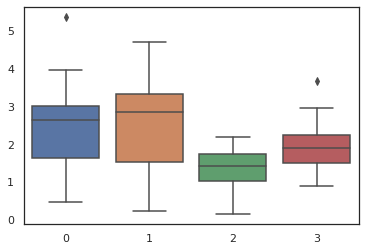

In [65]:
#define dataset
X, y = get_org_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 1.626 (0.032)
>svm 1.635 (0.031)
>rf 1.617 (0.023)
>lr 1.503 (0.018)


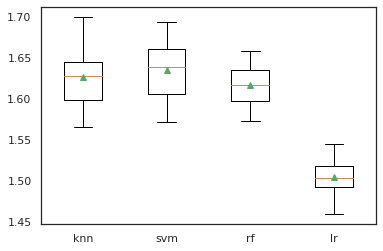

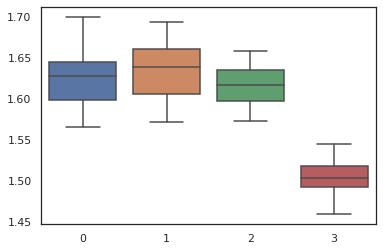

In [66]:
#define dataset
X, y = get_syn_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

## RMSE-AUG

>knn 3.600 (0.715)
>svm 3.522 (0.541)
>rf 2.833 (0.799)
>lr 2.435 (0.910)


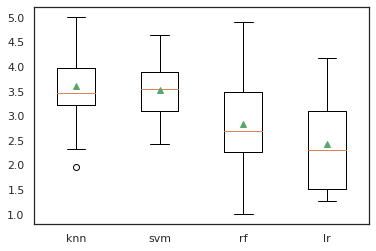

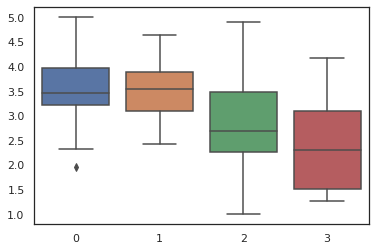

In [67]:
#define dataset
X, y = get_org_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 2.342 (0.047)
>svm 2.202 (0.044)
>rf 2.340 (0.045)
>lr 2.152 (0.039)


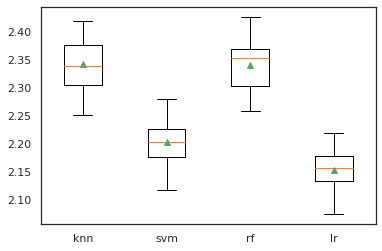

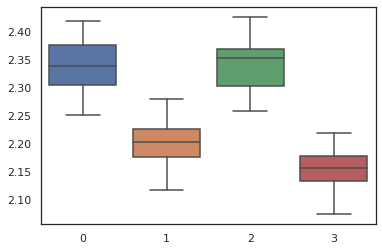

In [68]:
#define dataset
X, y = get_syn_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 2.514 (1.037)
>svm 2.424 (1.310)
>rf 1.352 (0.586)
>lr 1.922 (0.641)


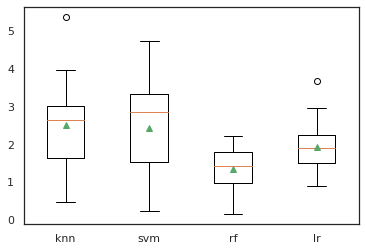

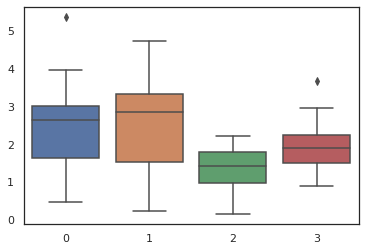

In [69]:
#define dataset
X, y = get_org_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 2.342 (0.047)
>svm 2.197 (0.045)
>rf 2.339 (0.043)
>lr 2.152 (0.039)


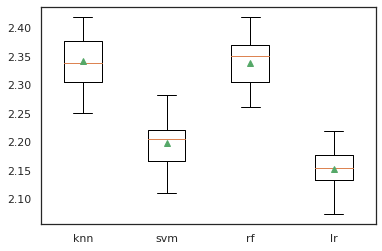

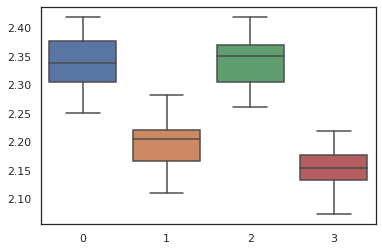

In [70]:
#define dataset
X, y = get_syn_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks([1],['ln', 'cart', 'svm', 'stacking'])
sns.boxplot(data=results)
plt.show()

In [71]:
# get the dataset
def get_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_FEB[(reshape_ocean_df_FEB['Station-Point']==station)&(reshape_ocean_df_FEB['DATE'].str.contains("-02-"))]
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

## MAE FEB

In [72]:
#evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    #define the evaluation procedure
    cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=42)
    #evaluate the model and collect the results
    scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
    return scores

>knn 1.956 (0.886)
>svm 1.493 (0.908)
>rf 0.927 (0.465)
>lr 1.455 (0.603)


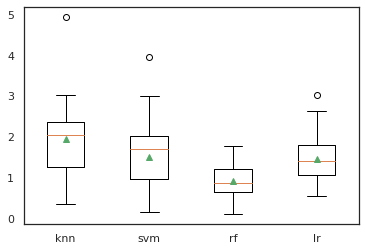

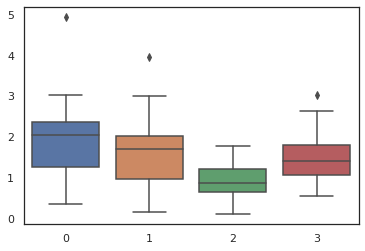

In [73]:
#define dataset
X, y = get_org_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 1.038 (0.020)
>svm 0.956 (0.018)
>rf 1.032 (0.016)
>lr 1.000 (0.013)


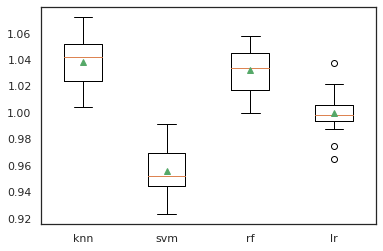

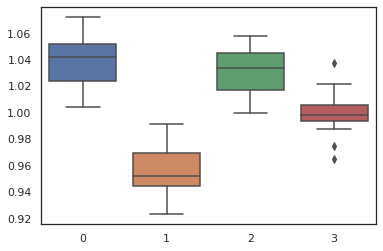

In [74]:
#define dataset
X, y = get_syn_dataset("104-08","FEB")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

## MAE AUG

>knn 3.105 (0.677)
>svm 2.874 (0.581)
>rf 2.336 (0.663)
>lr 1.987 (0.757)


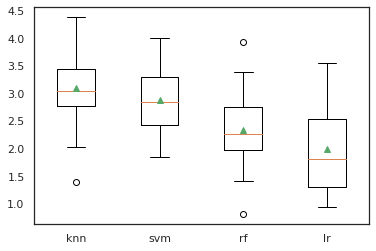

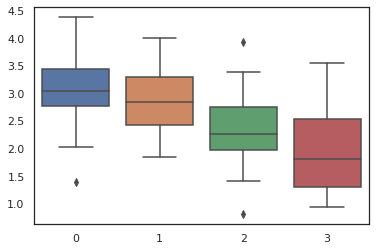

In [75]:
#define dataset
X, y = get_org_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks(range(5), ['KNN', 'CART', 'SVM', 'RF', 'LR'])
sns.boxplot(data=results)
plt.show()

>knn 1.773 (0.035)
>svm 1.666 (0.035)
>rf 1.765 (0.033)
>lr 1.652 (0.031)


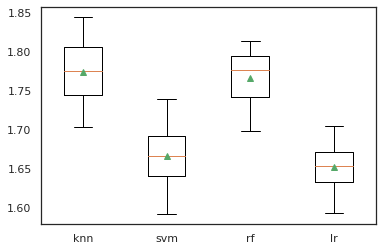

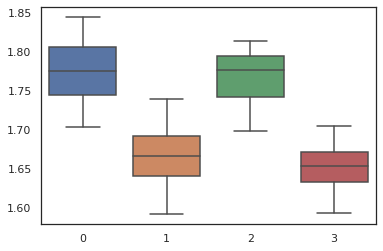

In [76]:
#define dataset
X, y = get_syn_dataset("104-08","AUG")
#get the models to evaluate
models=get_models()
#evalute the models and store results
results, names=list(), list()
for name, model in models.items():
    #evalute the model
    scores=evaluate_model(model, X, y)
    #store the results
    results.append(abs(scores))
    names.append(name)
    #summarize the performance alog the way
    print('>%s %.3f (%.3f)' % (name, mean(abs(scores)), std(scores)))

#plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

df = pd.DataFrame (data=names, columns = ['Single Model'])
df
plt.xticks([1],['ln', 'cart', 'svm', 'stacking'])
sns.boxplot(data=results)
plt.show()

In [77]:
from sklearn.multioutput import RegressorChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
#Regression Chain Model

level0 = list()
#level0.append(('lin_reg', RegressorChain(SVR())))
level0.append(('knn_reg', RegressorChain(KNeighborsRegressor())))
level0.append(('rnd_reg', RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))))
level0.append((('svr_reg',  RegressorChain(SVR(kernel = 'rbf')))))

#in_reg=RegressorChain(LinearRegression())
#nn_reg=RegressorChain(KNeighborsRegressor())
#nd_reg=RegressorChain(RandomForestRegressor(n_estimators=100, random_state=5))
#vr_reg=RegressorChain(SVR(kernel = 'rbf'))

reg=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=LinearRegression()))

reg.estimator.estimators_=reg.estimator.estimators
reg.estimator.final_estimator_=reg.estimator.final_estimator
reg.estimator.stack_method_=reg.estimator.stack_method

In [78]:
X, y = get_syn_dataset("104-08","FEB")

In [79]:
#define dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=3, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)


#make a prediction for one example
val = [11.6300, 0.4363]

yhat=model.predict([val])

In [80]:
def get_stacking():
    #define the base models
    level0=list()
    level0.append(('knn',KNeighborsRegressor()))
    level0.append(('cart',DecisionTreeRegressor()))
    level0.append(('svm',SVR()))
    #define meta learner model
    level1=LinearRegression()
    #define the stacking ensemble
    model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
    model.estimator.final_estimator_ = model.estimator.final_estimator
    return model

In [81]:
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
0,10.8755,0.545560
1,11.2468,0.521834
2,11.5500,0.569017
3,12.0325,0.624866
4,10.6748,0.544336
...,...,...
3995,10.2622,0.621151
3996,11.0221,0.631501
3997,10.6053,0.484351
3998,9.9149,0.542852


## Ensemble Stacking Model

In [82]:
X, y = get_syn_dataset("104-08","FEB")

In [83]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

MultiOutputRegressor(estimator=StackingRegressor(cv=5,
                                                 estimators=[('knn',
                                                              KNeighborsRegressor()),
                                                             ('rf',
                                                              RandomForestRegressor()),
                                                             ('svm', SVR())],
                                                 final_estimator=LinearRegression()))

In [84]:
# get the dataset
def get_org_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X,y

In [85]:
#X, y=get_org_test_dataset("104-08","AUG")

In [86]:
X_org, y_org=get_org_test_dataset("104-08","FEB")

In [87]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [88]:
arr_org_x_list
arr_org_list

array([[10.26  , 10.27  , 10.27  , 10.27  , 10.26  , 10.26  , 10.24  ,
        10.15  ,  8.42  ,  4.21  ],
       [11.0278, 11.0271, 11.0161, 11.0028, 10.9893, 10.9346, 10.7527,
        10.3524,  7.371 ,  2.8947],
       [11.2731, 11.2767, 11.2727, 11.2793, 11.2724, 11.2667, 11.2581,
        11.0974,  7.9537,  2.9224],
       [11.1419, 11.1552, 11.1534, 11.155 , 11.161 , 11.1625, 11.1661,
        11.0572, 10.1309,  6.3754],
       [12.3213, 12.3226, 12.3192, 12.3198, 12.326 , 12.3323, 12.3359,
        12.3447, 12.093 ,  7.18  ]])

### Tead Data Loading

In [89]:
X, y = get_org_test_dataset("104-08","FEB")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

,0,SSH
238,10.2600,0.6743
244,11.0269,0.6590
250,11.2695,0.7248
256,11.1396,0.7152
262,12.3169,0.8325


In [90]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

[10.26, 0.6743]
[11.0269, 0.659]
[11.2695, 0.7248]
[11.1396, 0.7152000000000001]
[12.3169, 0.8325]


In [91]:
results_yhat[0][0]

array([10.20079289, 10.2119059 , 10.11806082, 10.09274765,  9.52037592,
        9.24492203,  9.4085476 ,  8.14827489,  5.65898374,  3.26334862])

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 1.214
>MAE: 0.864


## Ensemble Stacking

In [93]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [94]:
print((A+B+C+D+E)/5)

1.216799324627981


In [95]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [96]:
print((A+B+C+D+E)/5)

0.9756568753502691


In [97]:
X, y = get_syn_dataset("104-08","FEB")

In [98]:
X_org, y_org=get_org_test_dataset("104-08","FEB")

In [99]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [100]:
arr_org_list

array([[10.26  , 10.27  , 10.27  , 10.27  , 10.26  , 10.26  , 10.24  ,
        10.15  ,  8.42  ,  4.21  ],
       [11.0278, 11.0271, 11.0161, 11.0028, 10.9893, 10.9346, 10.7527,
        10.3524,  7.371 ,  2.8947],
       [11.2731, 11.2767, 11.2727, 11.2793, 11.2724, 11.2667, 11.2581,
        11.0974,  7.9537,  2.9224],
       [11.1419, 11.1552, 11.1534, 11.155 , 11.161 , 11.1625, 11.1661,
        11.0572, 10.1309,  6.3754],
       [12.3213, 12.3226, 12.3192, 12.3198, 12.326 , 12.3323, 12.3359,
        12.3447, 12.093 ,  7.18  ]])

In [101]:
results_yhat

[array([[10.20079289, 10.2119059 , 10.11806082, 10.09274765,  9.52037592,
          9.24492203,  9.4085476 ,  8.14827489,  5.65898374,  3.26334862]]),
 array([[10.8530995 , 10.72596368, 10.55733796, 10.38536921,  9.92817313,
          9.65179389,  9.68205227,  8.69779779,  6.30771451,  3.98487216]]),
 array([[11.11435021, 11.04587748, 11.01386536, 10.89672313, 10.51895629,
         10.25222623, 10.20917755,  9.45249735,  7.94567644,  5.07155087]]),
 array([[10.99256576, 10.98919653, 10.94784852, 10.87540948, 10.16193076,
          9.70374343,  9.48080911,  8.62577396,  5.74652761,  3.65971318]]),
 array([[12.14470274, 11.94731498, 11.94912405, 11.96101482, 11.44418082,
         11.13210302, 10.72961594, 10.47735732, 10.11028157,  6.21265812]])]

In [102]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

>RMSE: 0.002
>MAE: 0.001


In [103]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

,0,10,20,30,50,75,100,125,150,200,250
0,12.3169,12.144703,11.947315,11.949124,11.961015,11.444181,11.132103,10.729616,10.477357,10.110282,6.212658


In [104]:
data_df=pd.DataFrame([results_yhat[1][0]],columns=['10','20','30','50','75','100','125','150','200','250'])

In [105]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

,0,10,20,30,50,75,100,125,150,200,250
0,12.3169,12.144703,11.947315,11.949124,11.961015,11.444181,11.132103,10.729616,10.477357,10.110282,6.212658


In [106]:
X_Date=get_date_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

'1993-02-09'

In [107]:
# get the dataset
def get_date_test_dataset(station,season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=reshape_ocean_df_test_FEB[(reshape_ocean_df_test_FEB['Station-Point']==station)&(reshape_ocean_df_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=reshape_ocean_df_test_APR[(reshape_ocean_df_test_APR['Station-Point']==station)&(reshape_ocean_df_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=reshape_ocean_df_test_JUN[(reshape_ocean_df_test_JUN['Station-Point']==station)&(reshape_ocean_df_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=reshape_ocean_df_test_AUG[(reshape_ocean_df_test_AUG['Station-Point']==station)&(reshape_ocean_df_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=reshape_ocean_df_test_OCT[(reshape_ocean_df_test_OCT['Station-Point']==station)&(reshape_ocean_df_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=reshape_ocean_df_test_DEC[(reshape_ocean_df_test_DEC['Station-Point']==station)&(reshape_ocean_df_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['Station-Point','DATE']]
    #y=temp[['10','20','30','50','75','100','125','150','200','250']]
    #y=temp
    return X

In [108]:
X_Date=get_date_test_dataset('104-08','FEB')
X_Date['DATE'].iloc[0]

'2013-02-26'

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


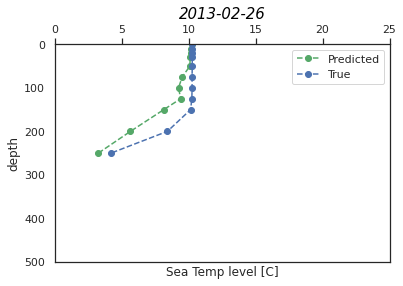

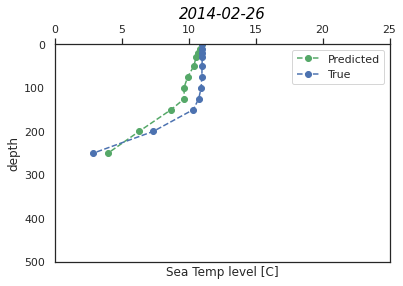

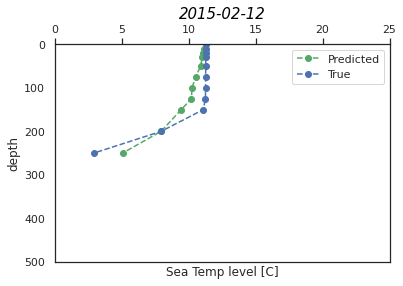

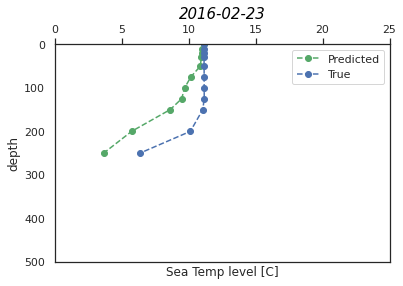

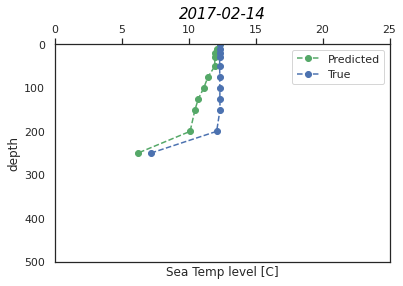

In [109]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

## Hycom Data Loading

In [110]:
hycom_temp_FEB=pd.read_csv('hycom_reanalysis_02.csv')
hycom_ssh_FEB=pd.read_csv('hycom_reanalysis_ssh_02.csv')
hycom_temp_AUG=pd.read_csv('hycom_reanalysis_08.csv')
hycom_ssh_AUG=pd.read_csv('hycom_reanalysis_ssh_08.csv')

In [111]:
hycom_ssh_AUG=hycom_ssh_AUG[['DATE','SSH']]
hycom_temp_AUG=hycom_temp_AUG[['DATE','0','10','20','30','50','75','100','125','150','200','250']]
hycom_ssh_FEB=hycom_ssh_FEB[['DATE','SSH']]
hycom_temp_FEB=hycom_temp_FEB[['DATE','0','10','20','30','50','75','100','125','150','200','250']]

In [112]:
hycom_reanal_FEB=hycom_temp_FEB.merge(hycom_ssh_FEB, how='inner',on='DATE')
hycom_reanal_AUG=hycom_temp_AUG.merge(hycom_ssh_AUG, how='inner',on='DATE')

In [113]:
# get the dataset
def get_hycom_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=hycom_reanal_FEB[(hycom_reanal_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=hycom_reanal_APR[(hycom_reanal_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=hycom_reanal_JUN[(hycom_reanal_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=hycom_reanal_AUG[(hycom_reanal_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=hycom_reanal_OCT[(hycom_reanal_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=hycom_reanal_DEC[(hycom_reanal_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X, y

In [114]:
# get the dataset
def get_hycom_test_dataset(season):
    #X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    #X,y=
    if (season=='FEB') : temp=hycom_test_FEB[(hycom_test_FEB['DATE'].str.contains("-02-"))]
    elif (season=='APR') : temp=hycom_test_APR[(hycom_test_APR['DATE'].str.contains("-04-"))]
    elif (season=='JUN') : temp=hycom_test_JUN[(hycom_test_JUN['DATE'].str.contains("-06-"))]
    elif (season=='AUG') : temp=hycom_test_AUG[(hycom_test_AUG['DATE'].str.contains("-08-"))]
    elif (season=='OCT') : temp=hycom_test_OCT[(hycom_test_OCT['DATE'].str.contains("-10-"))]
    elif (season=='DEC') : temp=hycom_test_DEC[(hycom_test_DEC['DATE'].str.contains("-12-"))]            
    #elif (season=='APR'):
    #                     temp=reshape_ocean_df[(reshape_ocean_df['Station-Point']==str(station))&(reshape_ocean_df['DATE'].str.contains("-04-"))]
    
    
    
    X=temp[['0','SSH']]
    y=temp[['10','20','30','50','75','100','125','150','200','250']]
    return X,y

In [115]:
hycom_test_FEB=hycom_reanal_FEB[(hycom_reanal_FEB["DATE"]>'2012-01-01')&(hycom_reanal_FEB["DATE"]<'2018-01-01')]
hycom_test_FEB=hycom_test_FEB[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]
hycom_test_AUG=hycom_reanal_AUG[(hycom_reanal_AUG["DATE"]>'2012-01-01')&(hycom_reanal_AUG["DATE"]<'2018-01-01')]
hycom_test_AUG=hycom_test_AUG[['DATE','SSH','0','10','20','30','50','75','100','125','150','200','250']]

In [116]:
X,y=get_hycom_test_dataset('FEB')

In [117]:
y

,10,20,30,50,75,100,125,150,200,250
19,10.173186,10.153664,10.133508,10.091955,9.995907,9.296235,7.223254,5.247843,2.586482,1.372361
20,10.907684,10.903091,10.898808,10.883798,10.814580,10.050483,8.314267,6.534249,4.341771,3.106667
21,11.227590,11.224610,11.219906,11.194846,11.080702,9.986565,7.528487,5.520906,3.244095,2.146275
22,10.783343,10.780626,10.778375,10.768965,10.714054,10.047780,8.784629,7.133186,4.805352,3.433755
23,11.277176,11.268675,11.262264,11.247168,11.161977,10.943489,10.412377,9.778821,6.426997,3.917268
24,12.547006,12.544456,12.541033,12.532752,12.508966,12.085556,10.643904,8.457109,4.774932,2.399184


In [118]:
X_hycom_org,y_hycom_org=get_hycom_test_dataset('FEB')
X_hycom_org
y_hycom_org
arr_hycom_org_list=y_hycom_org.to_numpy()
arr_hycom_org_x_list=X_hycom_org.to_numpy()

/home/gisuser/.conda/envs/ocean-deep/lib/python3.7/site-packages/ipykernel_launcher.py:60: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


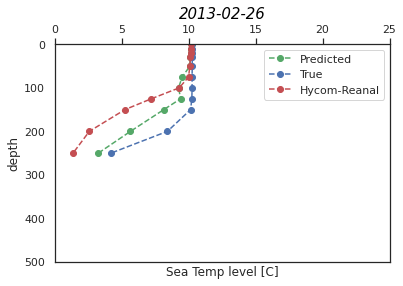

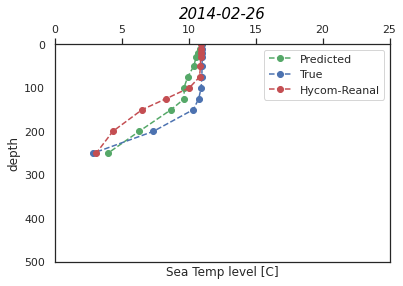

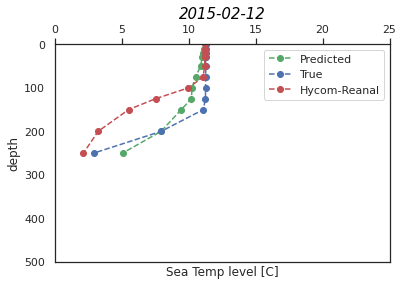

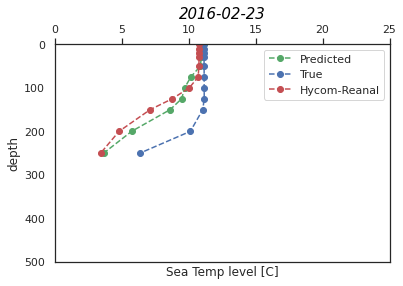

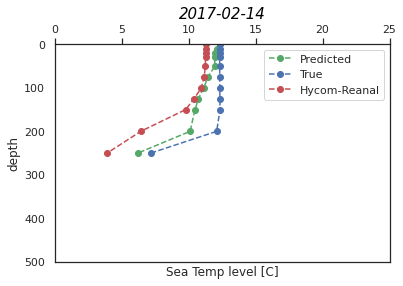

In [119]:
tmp=[]
tmp2=[]
tmp3=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
            
            
            tmp3.append(arr_hycom_org_x_list[idx][0])
            tmp3.append(arr_hycom_org_list[idx][0])
            tmp3.append(arr_hycom_org_list[idx][1])
            tmp3.append(arr_hycom_org_list[idx][2])
            tmp3.append(arr_hycom_org_list[idx][3])
            tmp3.append(arr_hycom_org_list[idx][4])
            tmp3.append(arr_hycom_org_list[idx][5])
            tmp3.append(arr_hycom_org_list[idx][6])
            tmp3.append(arr_hycom_org_list[idx][7])
            tmp3.append(arr_hycom_org_list[idx][8])
            tmp3.append(arr_hycom_org_list[idx][9])
            
            
            
            
            
            
            
            
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.plot(tmp3, Depth, 'ro--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True','Hycom-Reanal'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]
            tmp3=[]

## HYCOM PLOT (AUG)

In [120]:
X_hycom_org,y_hycom_org=get_hycom_test_dataset('AUG')
X_hycom_org
y_hycom_org
arr_hycom_org_list=y_hycom_org.to_numpy()
arr_hycom_org_x_list=X_hycom_org.to_numpy()

In [121]:
X_hycom_org

,0,SSH
19,26.362823,0.250477
20,26.744764,0.193698
21,24.860247,0.229195
22,26.087381,0.266033
23,27.933067,0.260566
24,26.069328,0.201695


In [122]:
y_hycom_org

,10,20,30,50,75,100,125,150,200,250
19,25.515158,21.765675,19.260082,15.945856,12.592514,9.597400,7.293516,5.525857,3.166454,1.756608
20,24.725811,20.748531,17.872488,14.577156,11.377829,8.453329,6.220469,4.485501,2.291262,1.301301
21,23.281443,20.683331,18.403172,16.168133,13.235413,10.505632,8.289638,6.481151,3.892431,2.343654
22,22.768732,20.413303,18.861874,16.297953,13.470495,10.980407,9.132618,7.566991,4.982081,3.233998
23,24.799826,21.356707,19.414589,16.353760,13.930354,11.399184,9.095364,7.068976,3.984635,2.218316
24,23.742701,18.380453,15.841661,12.566183,10.332350,8.468519,6.930191,5.687437,3.774723,2.250466


In [123]:
X, y = get_syn_dataset("104-08","AUG")

In [ ]:
# dataset
#X, y=make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1)

#define the base models
level0=list()
level0.append(('knn',KNeighborsRegressor()))
level0.append(('rf',RandomForestRegressor()))
level0.append(('svm',SVR()))

#define meta learner model
level1=LinearRegression()
#define the stacking ensemble
cv=RepeatedKFold(n_splits=10,n_repeats=5, random_state=1)
model=MultiOutputRegressor(StackingRegressor(estimators=level0, final_estimator=level1, cv=5))
model.estimator.final_estimator_ = model.estimator.final_estimator
model.fit(X,y)
#scores=cross_val_score(model, X, y,scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)

In [ ]:
X_org, y_org=get_org_test_dataset("104-08","AUG")

In [ ]:
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()

In [ ]:
## Test Data Loding

In [ ]:
X, y = get_org_test_dataset("104-08","AUG")
arr_x_list=X.to_numpy()
arr_y_list=y.to_numpy()
results_yhat=list()
X

In [ ]:
import numpy as np
for idx in range(len(X)):
#make a prediction for X-array
    val = [arr_x_list[idx][0], arr_x_list[idx][1]]
    print(val)
    yhat=model.predict([val])
    results_yhat.append(yhat)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]])
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

In [ ]:
A=mean_squared_error(arr_org_list[[0]], yhat)**0.5
B=mean_squared_error(arr_org_list[[1]], yhat)**0.5
C=mean_squared_error(arr_org_list[[2]], yhat)**0.5
D=mean_squared_error(arr_org_list[[3]], yhat)**0.5
E=mean_squared_error(arr_org_list[[4]], yhat)**0.5

In [ ]:
print((A+B+C+D+E)/5)

In [ ]:
A=mean_absolute_error(arr_org_list[[0]], yhat)
B=mean_absolute_error(arr_org_list[[1]], yhat)
C=mean_absolute_error(arr_org_list[[2]], yhat)
D=mean_absolute_error(arr_org_list[[3]], yhat)
E=mean_absolute_error(arr_org_list[[4]], yhat)

In [ ]:
print((A+B+C+D+E)/5)

In [ ]:
X, y = get_syn_dataset("104-08","AUG")
X_org, y_org=get_org_test_dataset("104-08","AUG")
arr_org_list=y_org.to_numpy()
arr_org_x_list=X_org.to_numpy()


In [ ]:
from sklearn.metrics import mean_absolute_error
sum_rmse=0
sum_mae=0
for idx in range(len(X_org)):
    #mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=False)
    sum_rmse=sum_rmse+mean_squared_error(arr_org_list[[0]], [results_yhat[idx][0]], squared=True)
    sum_mae=sum_mae+mean_absolute_error(arr_org_list[[0]], [results_yhat[idx][0]])

print('>%s %.3f' % ('RMSE:', sum_rmse/len(X)))
print('>%s %.3f' % ('MAE:', sum_mae/len(X)))

In [ ]:
import matplotlib.pyplot as plt
data_df=pd.DataFrame(yhat,columns=['10','20','30','50','75','100','125','150','200','250'])
surface={'0':val[0]}
temp_df=pd.DataFrame()
temp_df=temp_df.append(surface, ignore_index=True)

data_df=pd.concat([temp_df,data_df], axis=1)

df=pd.DataFrame(data_df)
tmp=[]
tmp2=[]

df

In [ ]:
X_Date=get_date_dataset('104-08','AUG')
X_Date['DATE'].iloc[0]

In [ ]:
X_Date=get_date_test_dataset('104-08','AUG')
X_Date['DATE'].iloc[0]

In [ ]:
tmp=[]
tmp2=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]

In [ ]:
X,y=get_hycom_test_dataset('AUG')

In [ ]:
X_hycom_org,y_hycom_org=get_hycom_test_dataset('AUG')
X_hycom_org
y_hycom_org
arr_hycom_org_list=y_hycom_org.to_numpy()
arr_hycom_org_x_list=X_hycom_org.to_numpy()

In [ ]:
tmp=[]
tmp2=[]
tmp3=[]
for idx in range(len(X_org)):
        data_df=pd.DataFrame([results_yhat[idx][0]],columns=['10','20','30','50','75','100','125','150','200','250'])
        surface={'0':arr_x_list[idx][0]}
        temp_df=pd.DataFrame()
        temp_df=temp_df.append(surface, ignore_index=True)
        data_df=pd.concat([temp_df,data_df], axis=1)
        df=pd.DataFrame(data_df)
        for index, row in df.iterrows():
            tmp.append(row['0'])
            tmp.append(row['10'])
            tmp.append(row['20'])
            tmp.append(row['30'])
            tmp.append(row['50'])
            tmp.append(row['75'])
            tmp.append(row['100'])
            tmp.append(row['125'])
            tmp.append(row['150'])
            tmp.append(row['200'])
            tmp.append(row['250'])
    
            tmp2.append(arr_org_x_list[idx][0])
            tmp2.append(arr_org_list[idx][0])
            tmp2.append(arr_org_list[idx][1])
            tmp2.append(arr_org_list[idx][2])
            tmp2.append(arr_org_list[idx][3])
            tmp2.append(arr_org_list[idx][4])
            tmp2.append(arr_org_list[idx][5])
            tmp2.append(arr_org_list[idx][6])
            tmp2.append(arr_org_list[idx][7])
            tmp2.append(arr_org_list[idx][8])
            tmp2.append(arr_org_list[idx][9])
            
            
            tmp3.append(arr_hycom_org_x_list[idx][0])
            tmp3.append(arr_hycom_org_list[idx][0])
            tmp3.append(arr_hycom_org_list[idx][1])
            tmp3.append(arr_hycom_org_list[idx][2])
            tmp3.append(arr_hycom_org_list[idx][3])
            tmp3.append(arr_hycom_org_list[idx][4])
            tmp3.append(arr_hycom_org_list[idx][5])
            tmp3.append(arr_hycom_org_list[idx][6])
            tmp3.append(arr_hycom_org_list[idx][7])
            tmp3.append(arr_hycom_org_list[idx][8])
            tmp3.append(arr_hycom_org_list[idx][9])
            
            
            
            
            
            
            
            
    
            Depth  = [0, 10,  20,  30,  50, 75, 100, 125, 150, 200, 250 ]
            fig = plt.figure()
            plt.title(X_Date['DATE'].iloc[idx],fontsize=15, fontstyle='italic',color='Black')
            ax = fig.add_subplot(111)
            ax.plot(tmp, Depth, 'go--')
            ax.plot(tmp2, Depth, 'bo--')
            ax.plot(tmp3, Depth, 'ro--')
            ax.xaxis.tick_top()
            ax.set_ylabel('depth')
            ax.set_ylim(500, 0)
            ax.set_xlim(0, 25)
            ax.set_xlabel('Sea Temp level [C]')
            ax.figure.legend(['Predicted','True','Hycom-Reanal'],bbox_to_anchor=(1,1),bbox_transform=ax.transAxes)
            plt.show()
            tmp=[]
            tmp2=[]
            tmp3=[]